# Import

In [13]:
import os
import cv2
import csv
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Global variable

In [2]:
DATAPATH = "data/"

allID_list = []
pid_mapping_dict = {}
sit_and_stand_dict = {}

# Load ID

In [3]:
allID_list = []

def load_id_typeString(data_path):
    tmpList = []

    for folder in list(os.listdir(data_path)):
        if folder!="50": 
            tmpList.append(folder)
    return tmpList
    
allID_list = load_id_typeString(DATAPATH)

In [4]:
print(f'[Info] number of pid: {len(allID_list)}\n')

print(allID_list)

[Info] number of pid: 88

['01', '02', '03', '04', '05', '06', '07', '09', '10', '100', '11', '12', '13', '16', '17', '18', '19', '20', '21', '22', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '43', '44', '45', '46', '48', '49', '51', '52', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


# Pid Mapping

In [5]:
pid_mapping_dict = {}

def pid_int_str_mapping(pidList):
    tmp_dict = {}
    
    for pid in pidList:
        pid_int = int(pid)
        pid_str = pid
        tmp_dict[pid_int] = {}
        tmp_dict[pid_int] = pid_str
    return tmp_dict
    
pid_mapping_dict = pid_int_str_mapping(allID_list)

In [6]:
print(f'number of mapping subject: {len(pid_mapping_dict)}\n')

print(pid_mapping_dict)

number of mapping subject: 88

{1: '01', 2: '02', 3: '03', 4: '04', 5: '05', 6: '06', 7: '07', 9: '09', 10: '10', 100: '100', 11: '11', 12: '12', 13: '13', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 24: '24', 25: '25', 26: '26', 27: '27', 28: '28', 29: '29', 30: '30', 31: '31', 32: '32', 33: '33', 34: '34', 35: '35', 36: '36', 37: '37', 38: '38', 39: '39', 40: '40', 43: '43', 44: '44', 45: '45', 46: '46', 48: '48', 49: '49', 51: '51', 52: '52', 57: '57', 58: '58', 59: '59', 60: '60', 61: '61', 62: '62', 63: '63', 64: '64', 65: '65', 66: '66', 67: '67', 68: '68', 69: '69', 70: '70', 71: '71', 72: '72', 73: '73', 74: '74', 75: '75', 76: '76', 77: '77', 78: '78', 79: '79', 80: '80', 81: '81', 82: '82', 83: '83', 84: '84', 85: '85', 86: '86', 87: '87', 88: '88', 89: '89', 90: '90', 91: '91', 92: '92', 93: '93', 94: '94', 95: '95', 96: '96', 97: '97', 98: '98', 99: '99'}


# Load Sit&Stand frame index

In [7]:
sit_and_stand_dict = {}

def load_sit_ant_stand_frame_index_from_csv_file(file_name):
    df = pd.read_csv(file_name)
    n_row = df.shape[0]

    tmp_dict = {}
    
    for i in range(n_row):
        pid_int = df.loc[i, 'pid']
        pid_str = pid_mapping_dict[pid_int]
        
        tmp_dict[pid_str] = {}
        for col_name in list(df.columns):
            if col_name!='pid':
                tmp_dict[pid_str][col_name] = df.loc[i, col_name]
    
    print(f'[File] {file_name}: {len(tmp_dict)} subjects.\n{list(df.columns)}')
    return tmp_dict
    

sit_and_stand_dict = load_sit_ant_stand_frame_index_from_csv_file("frameIdx_sit_and_stand_refine.csv")

[File] frameIdx_sit_and_stand_refine.csv: 88 subjects.
['pid', 'start1', 'end1', 'period1', 'start2', 'end2', 'period2']


In [8]:
print(f'==> key:    pid_str')
print(f'==> value: "start1", "end1, "period1", "start2", "end2", "period2"\n')

print(f'[Info] number of subject: {len(sit_and_stand_dict)}\n')

print(sit_and_stand_dict)

==> key:    pid_str
==> value: "start1", "end1, "period1", "start2", "end2", "period2"

[Info] number of subject: 88

{'01': {'start1': 8, 'end1': 24, 'period1': 16, 'start2': 258, 'end2': 278, 'period2': 20}, '02': {'start1': 8, 'end1': 20, 'period1': 12, 'start2': 218, 'end2': 232, 'period2': 14}, '03': {'start1': 0, 'end1': 12, 'period1': 12, 'start2': 223, 'end2': 241, 'period2': 18}, '04': {'start1': 51, 'end1': 69, 'period1': 18, 'start2': 411, 'end2': 420, 'period2': 9}, '05': {'start1': 58, 'end1': 87, 'period1': 29, 'start2': 727, 'end2': 766, 'period2': 39}, '06': {'start1': 53, 'end1': 63, 'period1': 10, 'start2': 281, 'end2': 298, 'period2': 17}, '07': {'start1': 30, 'end1': 51, 'period1': 21, 'start2': 320, 'end2': 335, 'period2': 15}, '09': {'start1': 171, 'end1': 193, 'period1': 22, 'start2': 666, 'end2': 706, 'period2': 40}, '10': {'start1': 66, 'end1': 101, 'period1': 35, 'start2': 535, 'end2': 590, 'period2': 55}, '100': {'start1': 49, 'end1': 74, 'period1': 25, 'star

# Coordinate Data

In [37]:
def create_sitstand_coord_csv_file(pidList):
    for pid in pidList:
        if pid == "84":
            start1 = sit_and_stand_dict[pid]['start1']
            end1 = sit_and_stand_dict[pid]['end1']
            start2 = sit_and_stand_dict[pid]['start2']
            end2 = sit_and_stand_dict[pid]['end2']
            
            print(f'start1: {start1}, end1: {end1}, start2: {start2}, end2: {end2}')

            csv_path_coord = DATAPATH + pid + '/' + pid + '_video_keypoints1.csv'
            csv_path_angle = DATAPATH + pid + '/' + pid + '_video_kneeAngles.csv'
            csv_path_out1 = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_coord.csv'
            csv_path_out2 = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_angle.csv'
            csv_path_out3 = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_coord.csv'
            csv_path_out4 = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_angle.csv'
            

            if (os.path.exists(csv_path_coord)==False) or (os.path.exists(csv_path_angle)==False):
                print(f'[Notice] pid {pid} coordinate & angle files do not exist.')
            else:
                coord_df = pd.read_csv(csv_path_coord, header=None)
                angle_df = pd.read_csv(csv_path_angle, header=None)

                sit2stand_coord_df = coord_df.iloc[start1:end1, :]
                sit2stand_angle_df = angle_df.iloc[start1:end1, :]
                stand2sit_coord_df = coord_df.iloc[start2:end2, :]
                stand2sit_angle_df = angle_df.iloc[start2:end2, :]

                # print(f'Sit-to-Stand:')
                # print(f' -n_row: {sit2stand_coord_df.shape[0]}, n_col: {sit2stand_coord_df.shape[1]}')
                # print(f' -n_row: {sit2stand_angle_df.shape[0]}, n_col: {sit2stand_angle_df.shape[1]}')
                # print(f'Stand-to-Sit:')
                # print(f' -n_row: {stand2sit_coord_df.shape[0]}, n_col: {stand2sit_coord_df.shape[1]}')
                # print(f' -n_row: {stand2sit_angle_df.shape[0]}, n_col: {stand2sit_angle_df.shape[1]}')
                
                sit2stand_coord_df.to_csv(csv_path_out1, index=False, header=False)
                sit2stand_angle_df.to_csv(csv_path_out2, index=False, header=False)
                stand2sit_coord_df.to_csv(csv_path_out3, index=False, header=False)
                stand2sit_angle_df.to_csv(csv_path_out4, index=False, header=False)


create_sitstand_coord_csv_file(allID_list)

start1: 50, end1: 79, start2: 257, end2: 274


# Combine Coord & Angle Data

In [38]:
def create_sitstand_timeSeries_csv_file(pidList):
    for pid in pidList:
        if pid >= "01":
            csv_path_1 = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_coord.csv'
            csv_path_2 = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_angle.csv'
            csv_path_3 = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_coord.csv'
            csv_path_4 = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_angle.csv'
            
            csv_out_1 = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_keypoints1.csv'
            csv_out_2 = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_keypoints1.csv'

            if (os.path.exists(csv_path_1)==False) or (os.path.exists(csv_path_3)==False):
                print(f'[Notice] pid {pid} coordinate & angle files do not exist.')
            else:
                ### Sit-to-Stand ============================
                coord_df = pd.read_csv(csv_path_1, header=None)
                angle_df = pd.read_csv(csv_path_2, header=None)
                combined_list = []
                
                for i in range(coord_df.shape[0]):
                    tmp_row = []
                    angle_left = angle_df.iloc[i, 0]
                    angle_right = angle_df.iloc[i, 1]
                    angle_avg = round((angle_left+angle_right)/2, 2)
                    for j in range(coord_df.shape[1]):
                        tmp_row.append(coord_df.iloc[i, j])
                    tmp_row.append(angle_avg)
                    combined_list.append(tmp_row)
                
                print(f'[pid {pid}] {csv_out_1}')
                with open(csv_out_1, 'w', newline='') as f:
                    write = csv.writer(f)
                    write.writerows(combined_list)
                    
                    
                ### Stand-to-Sit ============================
                coord_df = pd.read_csv(csv_path_3, header=None)
                angle_df = pd.read_csv(csv_path_4, header=None)
                combined_list = []
                
                for i in range(coord_df.shape[0]):
                    tmp_row = []
                    
                    angle_left = angle_df.iloc[i, 0]
                    angle_right = angle_df.iloc[i, 1]
                    angle_avg = round((angle_left+angle_right)/2, 2)
                    
                    for j in range(coord_df.shape[1]):
                        tmp_row.append(coord_df.iloc[i, j])
                    tmp_row.append(angle_avg)
                    combined_list.append(tmp_row)

                print(f'[pid {pid}] {csv_out_2}')
                with open(csv_out_2, 'w', newline='') as f:
                    write = csv.writer(f)
                    write.writerows(combined_list)

create_sitstand_timeSeries_csv_file(allID_list)

[pid 84] data/84/Sit-and-Stand/84_sit2stand_keypoints1.csv
[pid 84] data/84/Sit-and-Stand/84_stand2sit_keypoints1.csv
[pid 85] data/85/Sit-and-Stand/85_sit2stand_keypoints1.csv
[pid 85] data/85/Sit-and-Stand/85_stand2sit_keypoints1.csv
[pid 86] data/86/Sit-and-Stand/86_sit2stand_keypoints1.csv
[pid 86] data/86/Sit-and-Stand/86_stand2sit_keypoints1.csv
[pid 87] data/87/Sit-and-Stand/87_sit2stand_keypoints1.csv
[pid 87] data/87/Sit-and-Stand/87_stand2sit_keypoints1.csv
[pid 88] data/88/Sit-and-Stand/88_sit2stand_keypoints1.csv
[pid 88] data/88/Sit-and-Stand/88_stand2sit_keypoints1.csv
[pid 89] data/89/Sit-and-Stand/89_sit2stand_keypoints1.csv
[pid 89] data/89/Sit-and-Stand/89_stand2sit_keypoints1.csv
[pid 90] data/90/Sit-and-Stand/90_sit2stand_keypoints1.csv
[pid 90] data/90/Sit-and-Stand/90_stand2sit_keypoints1.csv
[pid 91] data/91/Sit-and-Stand/91_sit2stand_keypoints1.csv
[pid 91] data/91/Sit-and-Stand/91_stand2sit_keypoints1.csv
[pid 92] data/92/Sit-and-Stand/92_sit2stand_keypoints1.c

# Data Pre-Processing (Outliner)

In [76]:
# def data_preprocessing_outliner(pidList, ptIndex, mode):
#     for pid in pidList:
#         if pid == "01":
#             csv_path = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_keypoints1.csv'
#             csv_raw = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_1_sit2stand_raw_data.csv'
#             csv_smooth = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_2_sit2stand_smooth_data.csv'

#             if (os.path.exists(csv_path)==False) or (os.path.exists(csv_path)==False):
#                 print(f'[Notice] pid {pid} Sit-and-Stand file does not exist.')
#             else:
#                 df = pd.read_csv(csv_path, header=None)
#                 df = df.iloc[:, legs_keypointIdx]
#                 df_raw = df.transpose()
#                 n_feature, n_timestamp = df_raw.shape[0], df_raw.shape[1]

#                 coord_smooth = []
#                 for featureIdx in range(n_feature):
#                     value = df_raw.iloc[featureIdx, :]
#                     value_smooth = savgol_filter(value, window_length=len(value), polyorder=7)
#                     coord_smooth.append(value_smooth)
#                     # plt.figure(figsize=(5, 3))
#                     # plt.plot(value)
#                     # plt.plot(value_smooth, 'r')
#                     # plt.title(f'{featureIdx}')
#                     # plt.show()
#                 coord_smooth = np.array(coord_smooth)
#                 df_smooth = pd.DataFrame(coord_smooth)
#                 print(df_smooth.shape)
#                 df_raw.to_csv(csv_raw, index=None, header=None)
#                 df_smooth.to_csv(csv_smooth, index=None, header=None)
                    


# legs_keypointIdx = [33, 34, 36, 37, 39, 40, 42, 43, 45, 46, 48, 49, 51] ### 51: is angle index
# data_preprocessing_outliner(allID_list, legs_keypointIdx, "Sit2Stand")

(13, 16)


# Change y-Coordinate

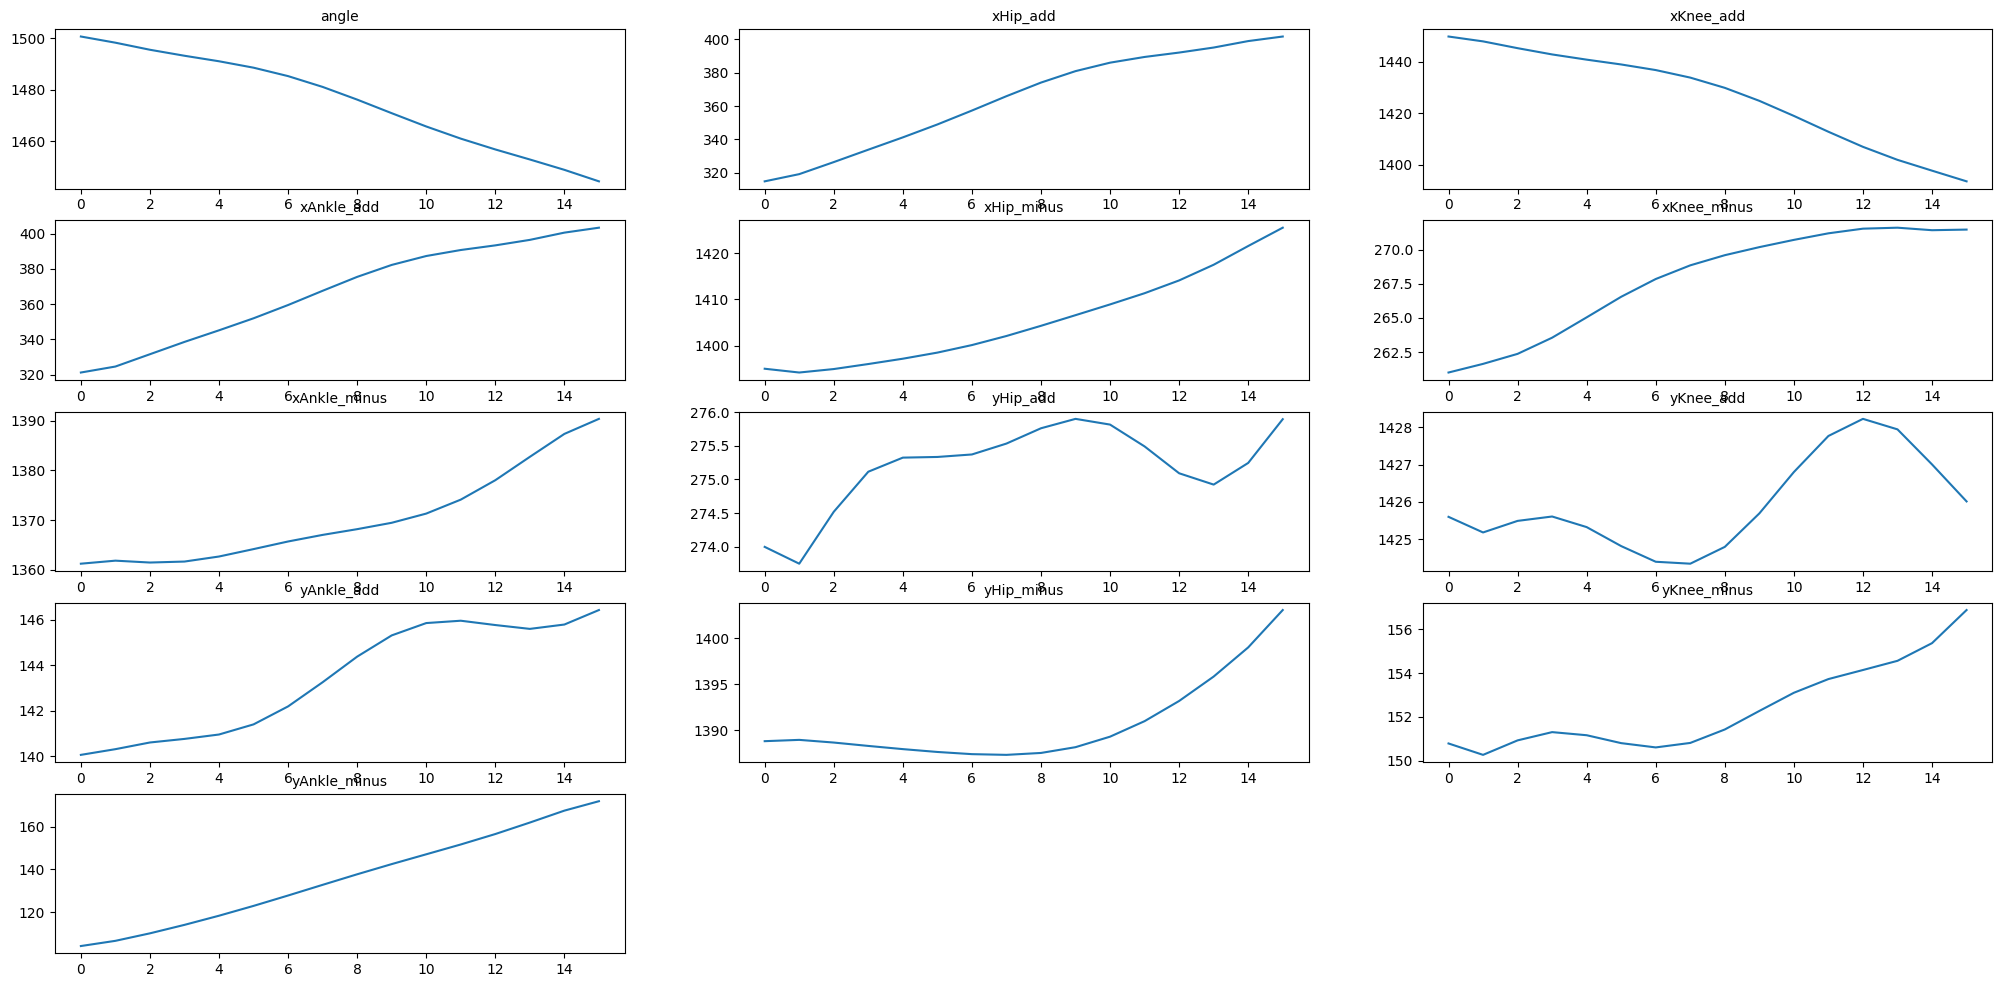

In [123]:
# def change_y_Coordinate(pidList):
#     for pid in pidList:
#         if pid == "01":
#             csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_2_sit2stand_smooth_data.csv'
#             csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_3_sit2stand_changeY_data.csv'

#             if (os.path.exists(csv_path)==False):
#                 print(f'[Notice] pid {pid} Sit-and-Stand file does not exist.')
#             else:
#                 df = pd.read_csv(csv_path, header=None)
#                 n_feature, n_timestamp = df.shape[0], df.shape[1]
#                 for fIdx in range(n_feature):
#                     if fIdx%2==1:
#                         for t in range(n_timestamp):
#                             value = df.iloc[[fIdx], [t]].values[0][0]
#                             new_value = 1080 - value
#                             df.iloc[[fIdx], [t]] = new_value
#                 df.to_csv(csv_path_output, index=None, header=None)

#                 plt.figure(figsize=(25, 12))
#                 feature_name_list = ['angle', 'xHip_add', 'xKnee_add', 'xAnkle_add', 'xHip_minus', 'xKnee_minus', 'xAnkle_minus', 'yHip_add', 'yKnee_add', 'yAnkle_add', 'yHip_minus', 'yKnee_minus', 'yAnkle_minus']
#                 for featureIdx in range(n_feature):
#                     value = df.iloc[featureIdx, :]
#                     plt.subplot(5, 3, featureIdx+1)
#                     plt.plot(value)
#                     plt.title(f'{feature_name_list[featureIdx]}', fontsize=10)
#                 plt.show()



# change_y_Coordinate(allID_list)

In [43]:
def change_y_Coordinate(pidList, keypointIdx):
    n_keypoint = len(keypointIdx)
    
    for pid in pidList:
        if pid > "01":
            csv_path_1 = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_keypoints1.csv'
            csv_path_2 = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_keypoints1.csv'
            
            csv_path_1_out = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_keypoints1_2.csv'
            csv_path_2_out = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_keypoints1_2.csv'

            if (os.path.exists(csv_path_1)==False) or (os.path.exists(csv_path_2)==False):
                print(f'[Notice] pid {pid} Sit-and-Stand file does not exist.')
            else:
                df1 = pd.read_csv(csv_path_1, header=None)
                df2 = pd.read_csv(csv_path_2, header=None)

                ### change y coord for [Sit-to-Stand]
                n_row, n_col = df1.shape[0], df1.shape[1]
                for i in range(n_row):
                    for j in range(n_keypoint):
                        kid = keypointIdx[j]
                        coordValue = df1.iloc[[i],[kid]]
                        df1.iloc[[i],[kid]] = 1080 - coordValue
                for i in range(n_row):
                    for j in range(n_col):
                        coordValue = df1.iloc[[i],[j]]
                        df1.iloc[[i],[j]] = round(coordValue, 2)
                
                ### change y coord for [Stand-to-Sit]
                n_row, n_col = df2.shape[0], df2.shape[1]
                for i in range(n_row):
                    for j in range(n_keypoint):
                        kid = keypointIdx[j]
                        coordValue = df2.iloc[[i],[kid]]
                        df2.iloc[[i],[kid]] = 1080 - coordValue
                for i in range(n_row):
                    for j in range(n_col):
                        coordValue = df2.iloc[[i],[j]]
                        df2.iloc[[i],[j]] = round(coordValue, 4)

                print(f'[pid {pid}] ')
                print(f' - {csv_path_1_out}\n - {csv_path_2_out}')
                df1.to_csv(csv_path_1_out, index=False, header=False)
                df2.to_csv(csv_path_2_out, index=False, header=False)


y_keypointIdx = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]
change_y_Coordinate(allID_list, y_keypointIdx)

[pid 02] 
 - data/02/Sit-and-Stand/02_sit2stand_keypoints1_2.csv
 - data/02/Sit-and-Stand/02_stand2sit_keypoints1_2.csv
[pid 03] 
 - data/03/Sit-and-Stand/03_sit2stand_keypoints1_2.csv
 - data/03/Sit-and-Stand/03_stand2sit_keypoints1_2.csv
[pid 04] 
 - data/04/Sit-and-Stand/04_sit2stand_keypoints1_2.csv
 - data/04/Sit-and-Stand/04_stand2sit_keypoints1_2.csv
[pid 05] 
 - data/05/Sit-and-Stand/05_sit2stand_keypoints1_2.csv
 - data/05/Sit-and-Stand/05_stand2sit_keypoints1_2.csv
[pid 06] 
 - data/06/Sit-and-Stand/06_sit2stand_keypoints1_2.csv
 - data/06/Sit-and-Stand/06_stand2sit_keypoints1_2.csv
[pid 07] 
 - data/07/Sit-and-Stand/07_sit2stand_keypoints1_2.csv
 - data/07/Sit-and-Stand/07_stand2sit_keypoints1_2.csv
[pid 09] 
 - data/09/Sit-and-Stand/09_sit2stand_keypoints1_2.csv
 - data/09/Sit-and-Stand/09_stand2sit_keypoints1_2.csv
[pid 10] 
 - data/10/Sit-and-Stand/10_sit2stand_keypoints1_2.csv
 - data/10/Sit-and-Stand/10_stand2sit_keypoints1_2.csv
[pid 100] 
 - data/100/Sit-and-Stand/100

# Generate Time Series Data

In [67]:
def generate_time_series_data(pidList, legs_keypointIdx, flag):
    for pid in pidList:
        if pid > "01":
            if flag=="sit-to-stand":
                cut_path = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_keypoints1_2.csv'
                cut_output = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_keypoints1_3.csv'
            elif flag=="stand-to-sit":
                cut_path = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_keypoints1_2.csv'
                cut_output = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_keypoints1_3.csv'
            else:
                print(f'[Notice] something wrong with flag.')

            if (os.path.exists(cut_path)==False) or (os.path.exists(cut_path)==False):
                print(f'[Notice] pid {pid} walking coordinate file does not exist.')
            else:
                df_all = pd.read_csv(cut_path, header=None)
                df = pd.read_csv(cut_path, header=None)

                df = df.iloc[:, legs_keypointIdx]
                n_row, n_col = df.shape[0], df.shape[1]

                df_new = pd.DataFrame()

                xHip_add, yHip_add = [], []
                xKnee_add, yKnee_add = [], []
                xAnkle_add, yAnkle_add = [], []
                xHip_minus, yHip_minus = [], []
                xKnee_minus, yKnee_minus = [], []
                xAnkle_minus, yAnkle_minus = [], []
                angle = []

                for i in range(n_row):
                    xHip_left, yHip_left = df.iloc[[i], [0]].values[0][0], df.iloc[[i], [1]].values[0][0]
                    xHip_right, yHip_right = df.iloc[[i], [2]].values[0][0], df.iloc[[i], [3]].values[0][0]
                    xKnee_left, yKnee_left = df.iloc[[i], [4]].values[0][0], df.iloc[[i], [5]].values[0][0]
                    xKnee_right, yKnee_right = df.iloc[[i], [6]].values[0][0], df.iloc[[i], [7]].values[0][0]
                    xAnkle_left, yAnkle_left = df.iloc[[i], [8]].values[0][0], df.iloc[[i], [9]].values[0][0]
                    xAnkle_right, yAnkle_right = df.iloc[[i], [10]].values[0][0], df.iloc[[i], [11]].values[0][0]

                    xHip_add.append(round(xHip_left+xHip_right, 4))
                    yHip_add.append(round(yHip_left+yHip_right, 4))
                    xKnee_add.append(round(xKnee_left+xKnee_right, 4))
                    yKnee_add.append(round(yKnee_left+yKnee_right, 4))
                    xAnkle_add.append(round(xAnkle_left+xAnkle_right, 4))
                    yAnkle_add.append(round(yAnkle_left+yAnkle_right, 4))

                    xHip_minus.append(round(np.abs(xHip_left-xHip_right), 4))
                    yHip_minus.append(round(np.abs(yHip_left-yHip_right), 4))
                    xKnee_minus.append(round(np.abs(xKnee_left-xKnee_right), 4))
                    yKnee_minus.append(round(np.abs(yKnee_left-yKnee_right), 4))
                    xAnkle_minus.append(round(np.abs(xAnkle_left-xAnkle_right), 4))
                    yAnkle_minus.append(round(np.abs(yAnkle_left-yAnkle_right), 4))
                    
                    angle.append(df_all.iloc[i, 51])

                nameList = ['angle', 'xHip_add', 'xKnee_add', 'xAnkle_add', 'xHip_minus', 'xKnee_minus', 'xAnkle_minus', 'yHip_add', 'yKnee_add', 'yAnkle_add', 'yHip_minus', 'yKnee_minus', 'yAnkle_minus']
                valueList = [angle, xHip_add, xKnee_add, xAnkle_add, xHip_minus, xKnee_minus, xAnkle_minus, yHip_add, yKnee_add, yAnkle_add, yHip_minus, yKnee_minus, yAnkle_minus]

                for i in range(len(nameList)):
                    col_name = nameList[i]
                    value = valueList[i]
                    df_new.insert(i, col_name, valueList[i])

                print(f'[pid {pid}] {cut_output}')
                df_new.to_csv(cut_output, index=None, header=None)
                
                
                
legs_keypointIdx = [33, 34, 36, 37, 39, 40, 42, 43, 45, 46, 48, 49]
generate_time_series_data(allID_list, legs_keypointIdx, "sit-to-stand")
generate_time_series_data(allID_list, legs_keypointIdx, "stand-to-sit")

[pid 02] data/02/Sit-and-Stand/02_sit2stand_keypoints1_3.csv
[pid 03] data/03/Sit-and-Stand/03_sit2stand_keypoints1_3.csv
[pid 04] data/04/Sit-and-Stand/04_sit2stand_keypoints1_3.csv
[pid 05] data/05/Sit-and-Stand/05_sit2stand_keypoints1_3.csv
[pid 06] data/06/Sit-and-Stand/06_sit2stand_keypoints1_3.csv
[pid 07] data/07/Sit-and-Stand/07_sit2stand_keypoints1_3.csv
[pid 09] data/09/Sit-and-Stand/09_sit2stand_keypoints1_3.csv
[pid 10] data/10/Sit-and-Stand/10_sit2stand_keypoints1_3.csv
[pid 100] data/100/Sit-and-Stand/100_sit2stand_keypoints1_3.csv
[pid 11] data/11/Sit-and-Stand/11_sit2stand_keypoints1_3.csv
[pid 12] data/12/Sit-and-Stand/12_sit2stand_keypoints1_3.csv
[pid 13] data/13/Sit-and-Stand/13_sit2stand_keypoints1_3.csv
[pid 16] data/16/Sit-and-Stand/16_sit2stand_keypoints1_3.csv
[pid 17] data/17/Sit-and-Stand/17_sit2stand_keypoints1_3.csv
[pid 18] data/18/Sit-and-Stand/18_sit2stand_keypoints1_3.csv
[pid 19] data/19/Sit-and-Stand/19_sit2stand_keypoints1_3.csv
[pid 20] data/20/Sit-

# Generate Time Series Data [Smooth first]

In [88]:
# def generate_time_series_data(pidList):
#     for pid in pidList:
#         if pid == "01":
#             csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_3_sit2stand_changeY_data.csv'
#             csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_4_sit2stand_timeSeries_data.csv'

#             if (os.path.exists(csv_path)==False):
#                 print(f'[Notice] pid {pid} sit-stand coordinate file does not exist.')
#             else:
#                 df = pd.read_csv(csv_path, header=None)
#                 n_feature, n_timestamp = df.shape[0], df.shape[1]

#                 xHip_add, yHip_add = [], []
#                 xKnee_add, yKnee_add = [], []
#                 xAnkle_add, yAnkle_add = [], []
#                 xHip_minus, yHip_minus = [], []
#                 xKnee_minus, yKnee_minus = [], []
#                 xAnkle_minus, yAnkle_minus = [], []
#                 angle = []
#                 for t in range(n_timestamp):
#                     avg_angle = df.iloc[[12], [t]].values[0][0]
#                     xHip_left, yHip_left = df.iloc[[0], [t]].values[0][0], df.iloc[[1], [t]].values[0][0]
#                     xHip_right, yHip_right = df.iloc[[2], [t]].values[0][0], df.iloc[[3], [t]].values[0][0]
#                     xKnee_left, yKnee_left = df.iloc[[4], [t]].values[0][0], df.iloc[[5], [t]].values[0][0]
#                     xKnee_right, yKnee_right = df.iloc[[6], [t]].values[0][0], df.iloc[[7], [t]].values[0][0]
#                     xAnkle_left, yAnkle_left = df.iloc[[8], [t]].values[0][0], df.iloc[[9], [t]].values[0][0]
#                     xAnkle_right, yAnkle_right = df.iloc[[10], [t]].values[0][0], df.iloc[[11], [t]].values[0][0]
                    
#                     xHip_add.append(round(np.abs(xHip_left+xHip_right), 4))
#                     yHip_add.append(round(np.abs(yHip_left+yHip_right), 4))
#                     xKnee_add.append(round(np.abs(xKnee_left+xKnee_right), 4))
#                     yKnee_add.append(round(np.abs(yKnee_left+yKnee_right), 4))
#                     xAnkle_add.append(round(np.abs(xAnkle_left+xAnkle_right), 4))
#                     yAnkle_add.append(round(np.abs(yAnkle_left+yAnkle_right), 4))
#                     xHip_minus.append(round(np.abs(xHip_left-xHip_right), 4))
#                     yHip_minus.append(round(np.abs(yHip_left-yHip_right), 4))
#                     xKnee_minus.append(round(np.abs(xKnee_left-xKnee_right), 4))
#                     yKnee_minus.append(round(np.abs(yKnee_left-yKnee_right), 4))
#                     xAnkle_minus.append(round(np.abs(xAnkle_left-xAnkle_right), 4))
#                     yAnkle_minus.append(round(np.abs(yAnkle_left-yAnkle_right), 4))
#                     angle.append(np.abs(avg_angle))

#                 df_new = pd.DataFrame()
#                 nameList = ['angle', 'xHip_add', 'xKnee_add', 'xAnkle_add', 'xHip_minus', 'xKnee_minus', 'xAnkle_minus', 'yHip_add', 'yKnee_add', 'yAnkle_add', 'yHip_minus', 'yKnee_minus', 'yAnkle_minus']
#                 valueList = [angle, xHip_add, xKnee_add, xAnkle_add, xHip_minus, xKnee_minus, xAnkle_minus, yHip_add, yKnee_add, yAnkle_add, yHip_minus, yKnee_minus, yAnkle_minus]

#                 for i in range(len(nameList)):
#                     col_name = nameList[i]
#                     value = valueList[i]
#                     df_new.insert(i, col_name, valueList[i])
#                 df_new = df_new.transpose()
#                 print(f'[pid {pid}] {csv_path_output}')
#                 df_new.to_csv(csv_path_output, index=None, header=None)

# generate_time_series_data(allID_list)

[pid 01] data/01/Sit-and-Stand_20240314/01_4_sit2stand_timeSeries_data.csv


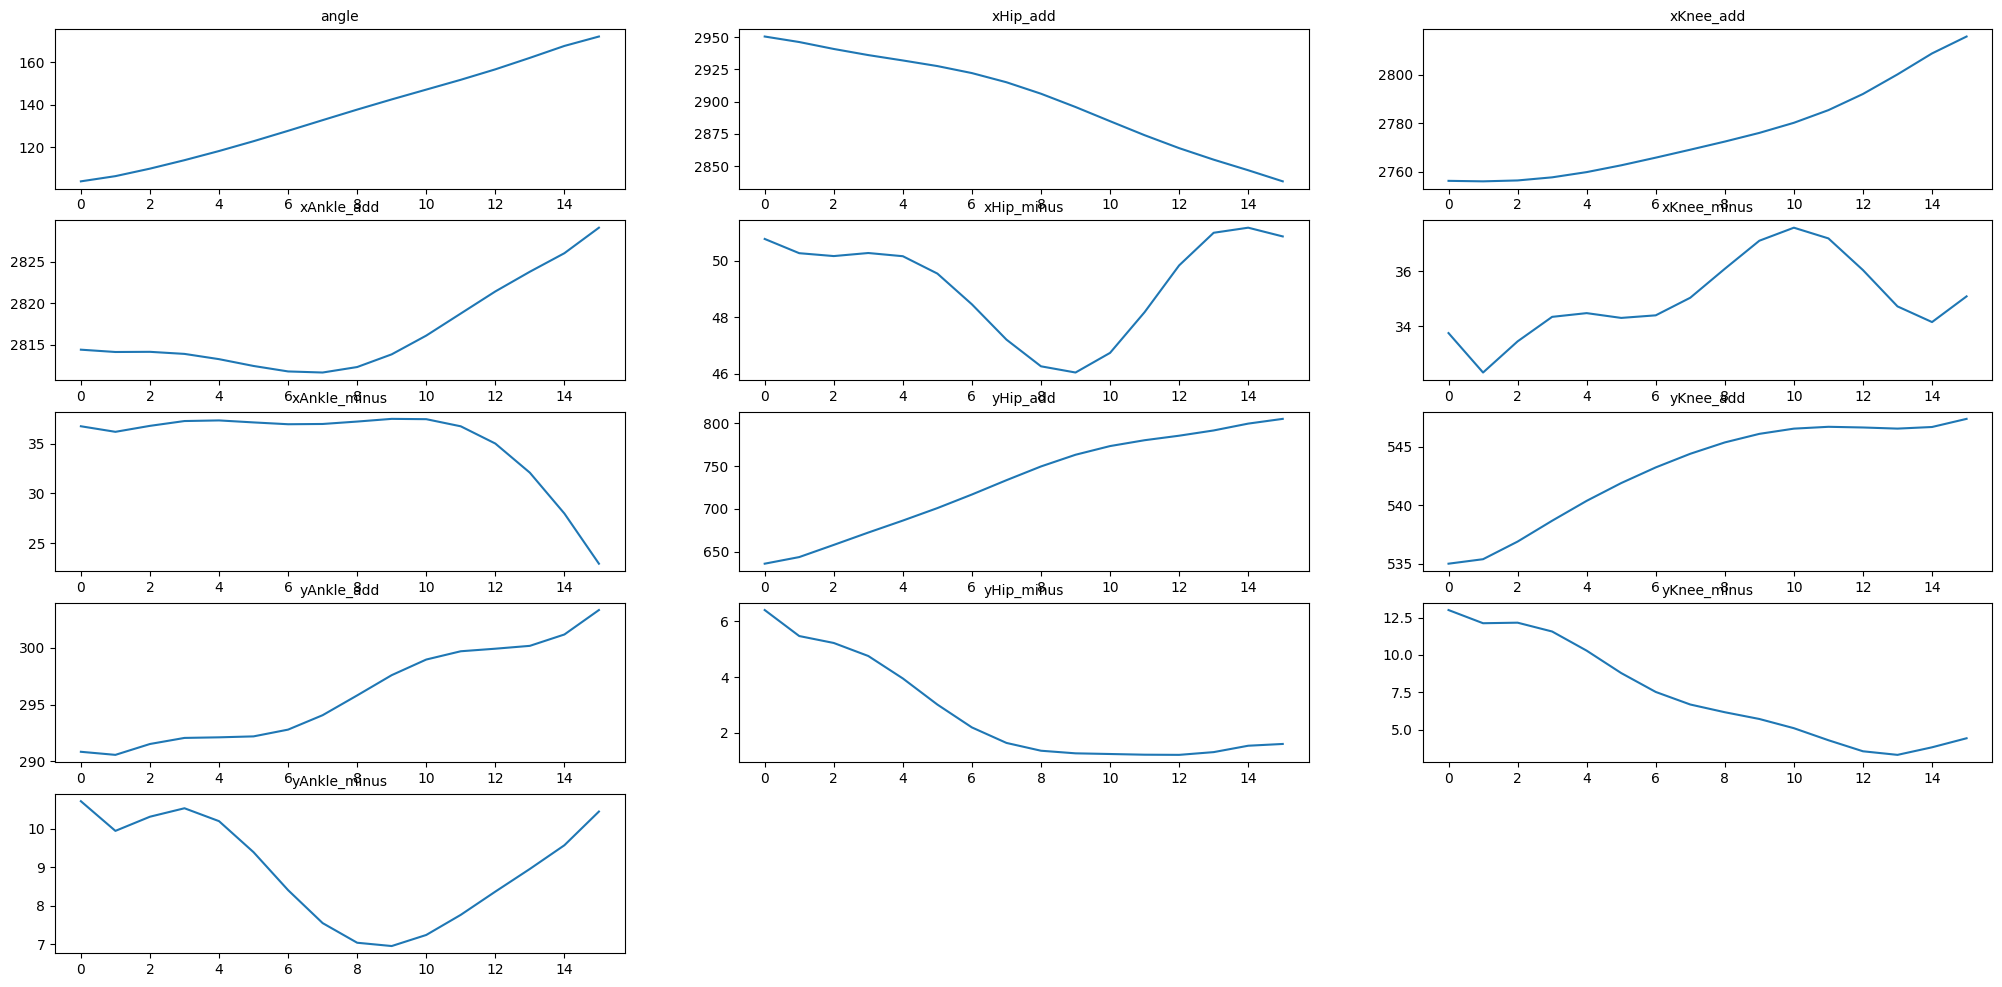

In [120]:
# def visualize_timeSeries_data(pidList):
#     for pid in pidList:
#         if pid == '01':
#             csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_4_sit2stand_timeSeries_data.csv'
#             df = pd.read_csv(csv_path, header=None)
#             n_feature, n_timestamp = df.shape[0], df.shape[1]

#             plt.figure(figsize=(25, 12))
#             feature_name_list = ['angle', 'xHip_add', 'xKnee_add', 'xAnkle_add', 'xHip_minus', 'xKnee_minus', 'xAnkle_minus', 'yHip_add', 'yKnee_add', 'yAnkle_add', 'yHip_minus', 'yKnee_minus', 'yAnkle_minus']
#             for featureIdx in range(n_feature):
#                 value = df.iloc[featureIdx, :]
#                 plt.subplot(5, 3, featureIdx+1)
#                 plt.title(f'{feature_name_list[featureIdx]}', fontsize=10)
#                 plt.plot(value)
#             plt.show()
            

# visualize_timeSeries_data(allID_list)

In [109]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# def normalize_timeSeries_data(pidList):
#     for pid in pidList:
#         if pid == "01":
#             csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_4_sit2stand_timeSeries_data.csv'
#             csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_5_sit2stand_timeSeries_normalize_data.csv'

#             if (os.path.exists(csv_path)==False):
#                 print(f'[Notice] pid {pid} sit-stand coordinate file does not exist.')
#             else:
#                 df = pd.read_csv(csv_path, header=None)
#                 n_feature, n_timestamp = df.shape[0], df.shape[1]

#                 data_scaled = []
#                 for featureIdx in range(n_feature):
#                     value = np.array(df.iloc[featureIdx, :].values)
#                     value = value.reshape(len(value), 1)
#                     scaler = MinMaxScaler()
#                     value_scaled = scaler.fit_transform(value)
#                     value_scaled = value_scaled.reshape(-1)
#                     data_scaled.append(value_scaled)
                
#                 df_scaled = pd.DataFrame(data_scaled)
#                 print(f'[pid {pid}] {csv_path_output}')
#                 df_scaled.to_csv(csv_path_output, index=None, header=None)

# normalize_timeSeries_data(allID_list)

[pid 01] data/01/Sit-and-Stand_20240314/01_5_sit2stand_timeSeries_normalize2_data.csv


In [49]:
def smooth_coordinate(df):
    ### data.shape = (96, 13) = 96 rows, 13 cols
    n_rows = df.shape[0]
    n_cols = df.shape[1]

    resultArray_smooth = []
    for i in range(n_cols):
        x = df.iloc[:, i].values

        tmp_window_length = 20
        tmp_polyorder = 15
        if n_rows < 20:
            tmp_window_length = n_rows
            tmp_polyorder = tmp_window_length - 2

        x_smooth = savgol_filter(x, window_length=tmp_window_length, polyorder=tmp_polyorder)
        # x_smooth = savgol_filter(x, window_length=7, polyorder=5)
        # x_smooth = savgol_filter(x, window_length=int(n_rows*6/7), polyorder=int(n_rows*5/7))
        # x_smooth = savgol_filter(x, window_length=int(n_rows*6/7), polyorder=int(n_rows*2/3))
        x_smooth = np.round(x_smooth, 2)
        resultArray_smooth.append(x_smooth)

        # plt.figure(figsize=(5, 3))
        # plt.plot(x, 'r', label='data')
        # plt.plot(x_smooth, 'b', label='smooth')
        # plt.legend()
        # plt.show()

    smooth_data = []
    resultArray = np.array(resultArray_smooth)
    nFrames = resultArray.shape[1]
    for i in range(nFrames):
        smooth_data.append([resultArray[0][i], resultArray[1][i],
                            resultArray[2][i], resultArray[3][i],
                            resultArray[4][i], resultArray[5][i],
                            resultArray[6][i], resultArray[7][i],
                            resultArray[8][i], resultArray[9][i],
                            resultArray[10][i], resultArray[11][i], resultArray[12][i]])
    smooth_data = np.array(smooth_data)
    df_smooth = pd.DataFrame(smooth_data)
    return df_smooth


def generate_time_series_data(pidList, legs_keypointIdx, flag):
    for pid in pidList:
        # if pid == "01":
        # if pid == "05":
        if pid > "01":
            if os.path.exists(DATAPATH + pid + '/Sit-and-Stand_20240314/')==False:
                os.mkdir(DATAPATH + pid + '/Sit-and-Stand_20240314/')

            if flag=="sit-to-stand":
                cut_path = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_keypoints1_2.csv'
                cut_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_sit2stand_keypoints_timeseries.csv'
            elif flag=="stand-to-sit":
                cut_path = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_keypoints1_2.csv'
                cut_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_stand2sit_keypoints_timeseries.csv'
            else:
                print(f'[Notice] something wrong with flag.')

            if (os.path.exists(cut_path)==False) or (os.path.exists(cut_path)==False):
                print(f'[Notice] pid {pid} walking coordinate file does not exist.')
            else:
                df_all = pd.read_csv(cut_path, header=None)
                df = pd.read_csv(cut_path, header=None)

                df = df.iloc[:, legs_keypointIdx]
                n_row, n_col = df.shape[0], df.shape[1]

                df = smooth_coordinate(df) ### shape=(n_frame, 13), which means 13 features (12 coord + 1 angle)

                df_new = pd.DataFrame()

                xHip_add, yHip_add = [], []
                xKnee_add, yKnee_add = [], []
                xAnkle_add, yAnkle_add = [], []
                xHip_minus, yHip_minus = [], []
                xKnee_minus, yKnee_minus = [], []
                xAnkle_minus, yAnkle_minus = [], []
                angle = []

                for i in range(n_row):
                    xHip_left, yHip_left = df.iloc[[i], [0]].values[0][0], df.iloc[[i], [1]].values[0][0]
                    xHip_right, yHip_right = df.iloc[[i], [2]].values[0][0], df.iloc[[i], [3]].values[0][0]
                    xKnee_left, yKnee_left = df.iloc[[i], [4]].values[0][0], df.iloc[[i], [5]].values[0][0]
                    xKnee_right, yKnee_right = df.iloc[[i], [6]].values[0][0], df.iloc[[i], [7]].values[0][0]
                    xAnkle_left, yAnkle_left = df.iloc[[i], [8]].values[0][0], df.iloc[[i], [9]].values[0][0]
                    xAnkle_right, yAnkle_right = df.iloc[[i], [10]].values[0][0], df.iloc[[i], [11]].values[0][0]

                    xHip_add.append(round(np.abs(xHip_left+xHip_right), 4))
                    yHip_add.append(round(np.abs(yHip_left+yHip_right), 4))
                    xKnee_add.append(round(np.abs(xKnee_left+xKnee_right), 4))
                    yKnee_add.append(round(np.abs(yKnee_left+yKnee_right), 4))
                    xAnkle_add.append(round(np.abs(xAnkle_left+xAnkle_right), 4))
                    yAnkle_add.append(round(np.abs(yAnkle_left+yAnkle_right), 4))

                    xHip_minus.append(round(np.abs(xHip_left-xHip_right), 4))
                    yHip_minus.append(round(np.abs(yHip_left-yHip_right), 4))
                    xKnee_minus.append(round(np.abs(xKnee_left-xKnee_right), 4))
                    yKnee_minus.append(round(np.abs(yKnee_left-yKnee_right), 4))
                    xAnkle_minus.append(round(np.abs(xAnkle_left-xAnkle_right), 4))
                    yAnkle_minus.append(round(np.abs(yAnkle_left-yAnkle_right), 4))
                    
                    angle.append(np.abs(df.iloc[[i], [12]].values[0][0]))

                nameList = ['angle', 'xHip_add', 'xKnee_add', 'xAnkle_add', 'xHip_minus', 'xKnee_minus', 'xAnkle_minus', 'yHip_add', 'yKnee_add', 'yAnkle_add', 'yHip_minus', 'yKnee_minus', 'yAnkle_minus']
                valueList = [angle, xHip_add, xKnee_add, xAnkle_add, xHip_minus, xKnee_minus, xAnkle_minus, yHip_add, yKnee_add, yAnkle_add, yHip_minus, yKnee_minus, yAnkle_minus]

                for i in range(len(nameList)):
                    col_name = nameList[i]
                    value = valueList[i]
                    df_new.insert(i, col_name, valueList[i])

                print(f'[pid {pid}] {cut_output}')
                df_new.to_csv(cut_output, index=None, header=None)
                
                
                
legs_keypointIdx = [33, 34, 36, 37, 39, 40, 42, 43, 45, 46, 48, 49, 51] ### 51: is angle index

generate_time_series_data(allID_list, legs_keypointIdx, "sit-to-stand")
generate_time_series_data(allID_list, legs_keypointIdx, "stand-to-sit")

[pid 02] data/02/Sit-and-Stand_20240314/02_sit2stand_keypoints_timeseries.csv
[pid 03] data/03/Sit-and-Stand_20240314/03_sit2stand_keypoints_timeseries.csv
[pid 04] data/04/Sit-and-Stand_20240314/04_sit2stand_keypoints_timeseries.csv
[pid 05] data/05/Sit-and-Stand_20240314/05_sit2stand_keypoints_timeseries.csv
[pid 06] data/06/Sit-and-Stand_20240314/06_sit2stand_keypoints_timeseries.csv
[pid 07] data/07/Sit-and-Stand_20240314/07_sit2stand_keypoints_timeseries.csv
[pid 09] data/09/Sit-and-Stand_20240314/09_sit2stand_keypoints_timeseries.csv
[pid 10] data/10/Sit-and-Stand_20240314/10_sit2stand_keypoints_timeseries.csv
[pid 100] data/100/Sit-and-Stand_20240314/100_sit2stand_keypoints_timeseries.csv
[pid 11] data/11/Sit-and-Stand_20240314/11_sit2stand_keypoints_timeseries.csv
[pid 12] data/12/Sit-and-Stand_20240314/12_sit2stand_keypoints_timeseries.csv
[pid 13] data/13/Sit-and-Stand_20240314/13_sit2stand_keypoints_timeseries.csv
[pid 16] data/16/Sit-and-Stand_20240314/16_sit2stand_keypoint

# Down Sampling

In [50]:
def get_sitstand_period_time(pidList):
    sit2stand_min = 1000
    sit2stand_max = 0
    stand2sit_min = 1000
    stand2sit_max = 0
    for key in sit_and_stand_dict:
        p1 = sit_and_stand_dict[key]['period1']
        p2 = sit_and_stand_dict[key]['period2']
        
        if p1>sit2stand_max: sit2stand_max = p1
        if p1<sit2stand_min: sit2stand_min = p1
        if p2>stand2sit_max: stand2sit_max = p2
        if p2<stand2sit_min: stand2sit_min = p2
        
    return sit2stand_min, sit2stand_max, stand2sit_min, stand2sit_max


sit2stand_min, sit2stand_max, stand2sit_min, stand2sit_max = get_sitstand_period_time(allID_list)
print(f'[Sit-to-Stand] min: {sit2stand_min}, max: {sit2stand_max}')
print(f'[Stand-to-Sit] min: {stand2sit_min}, max: {stand2sit_max}')

[Sit-to-Stand] min: 7, max: 200
[Stand-to-Sit] min: 7, max: 151


In [99]:
# def downsampling_to_specific_length(df, minNum):
#     df = df.transpose()
#     df.set_index(pd.date_range(start='1/1/2000', periods=len(df), end='7/1/2000'), inplace=True)
    
#     resampled_df = pd.DataFrame()
#     if df.shape[0] > minNum: 
#         resampled_df = df.resample('1ME').mean() # resampled_df = df.resample('1M').mean()
#         resampled_df.reset_index(inplace=True, drop=True)
#     else:
#         print(f'Need to check number of rows of df.')
#     if resampled_df.shape[0] != minNum:
#         print(f'[Notice] Not same length!')
#     resampled_df = resampled_df.transpose()
#     return resampled_df


# def downsampling_timeSeries_data(pidList):
#     tmp_min, tmp_max = 0, 0
#     for pid in pidList:
#         if pid == '01':
#             csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_5_sit2stand_timeSeries_normalize_data.csv'
#             csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_6_sit2stand_timeSeries_downsampling.csv'
#             tmp_min = sit2stand_min
#             tmp_max = sit2stand_max

#             if not os.path.exists(csv_path):
#                 print(f'[pid {pid}] time series data csv file does not exist.')
#             else:
#                 df = pd.read_csv(csv_path, header=None)
#                 n_feature, n_timestamp = df.shape[0], df.shape[1]

#                 df_downsampling = pd.DataFrame()
#                 if n_timestamp > tmp_min:
#                     df_downsampling = downsampling_to_specific_length(df, tmp_min)
#                     print(f'[pid {pid}] {csv_path} [{df.shape[0]}, {df.shape[1]}]->[{df_downsampling.shape[0]}, {df_downsampling.shape[1]}]')
#                 else:
#                     print(f'-> no downsampling.')
#                 df_downsampling.to_csv(csv_path_output, index=False, header=False)
       
    

# downsampling_timeSeries_data(allID_list)

[pid 01] data/01/Sit-and-Stand_20240314/01_5_sit2stand_timeSeries_normalize_data.csv [13, 16]->[13, 7]


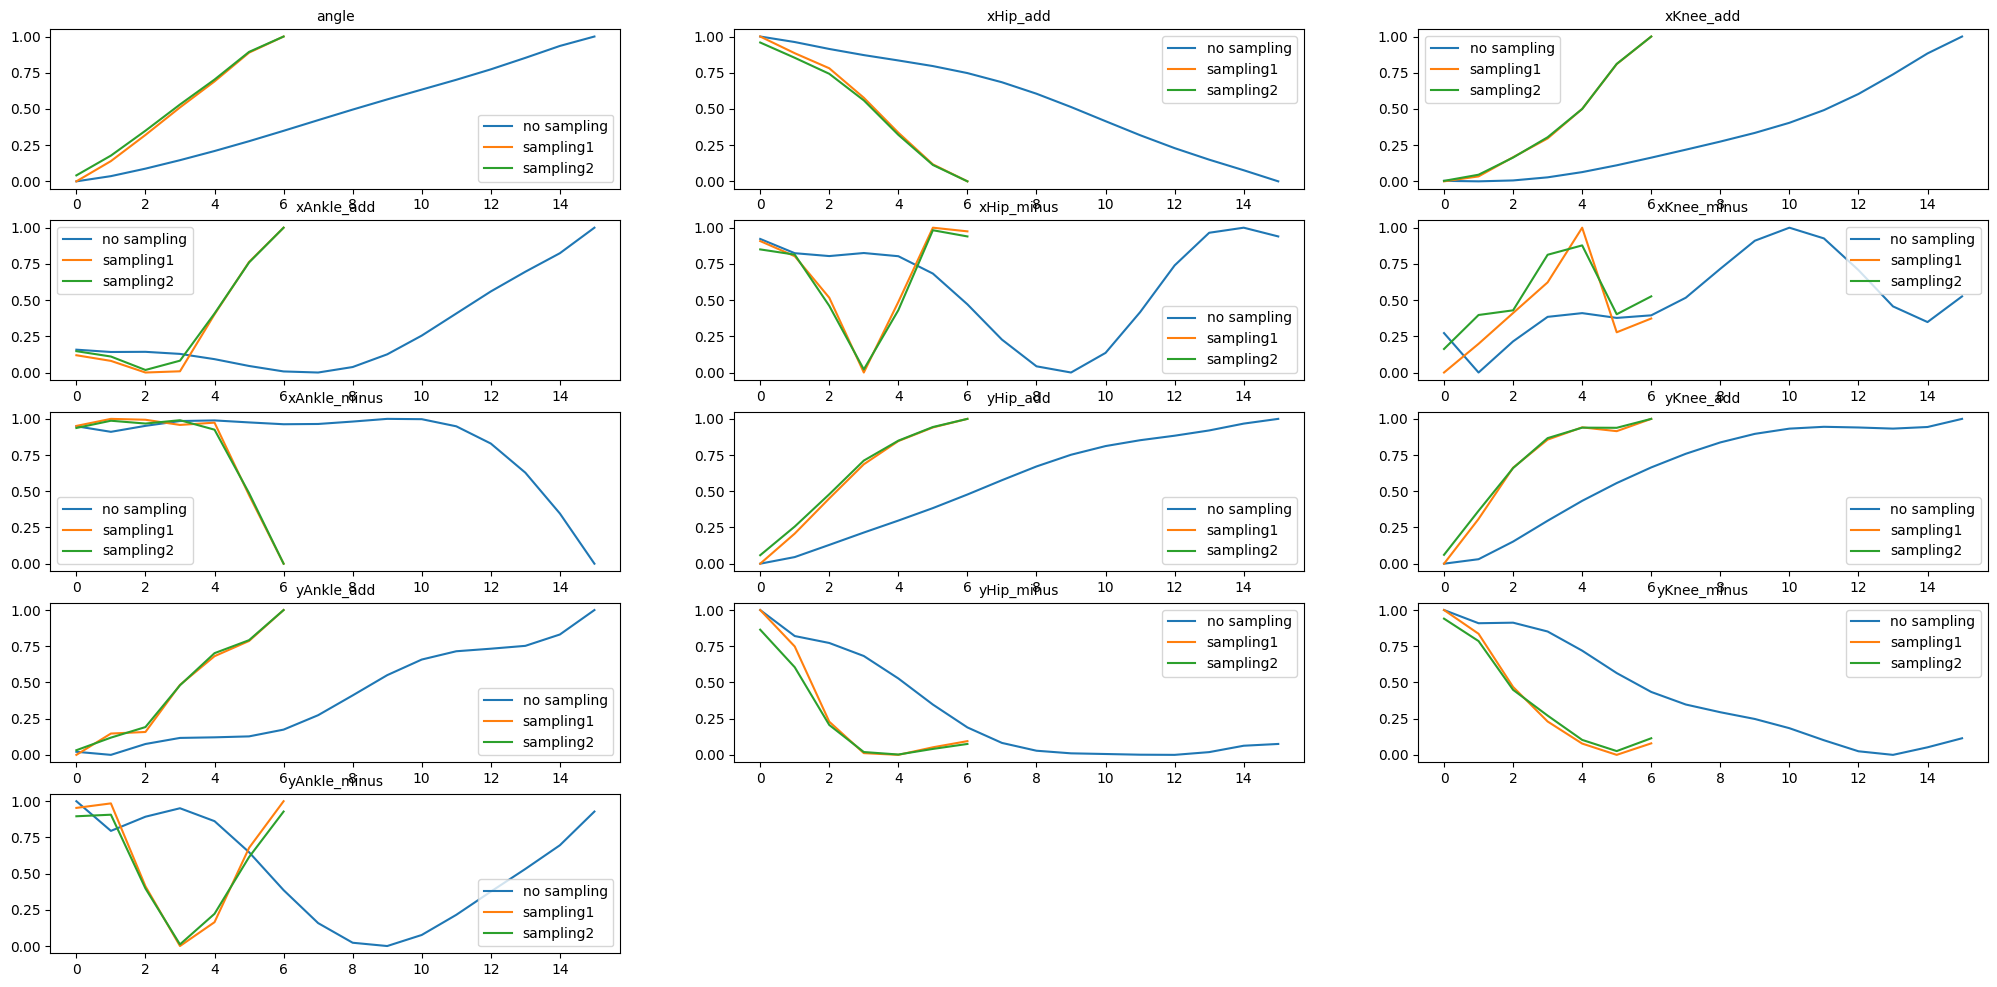

In [122]:
# def visualize_downsampling_data(pidList):
#     for pid in pidList:
#         if pid == '01':
#             csv_path0 = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_sit2stand_keypoints_downsampling.csv'
#             csv_path1 = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_5_sit2stand_timeSeries_normalize_data.csv'
#             csv_path2 = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_6_sit2stand_timeSeries_downsampling.csv'
#             df0 = pd.read_csv(csv_path0, header=None)
#             df0 = df0.transpose()
#             df1 = pd.read_csv(csv_path1, header=None)
#             df2 = pd.read_csv(csv_path2, header=None)
#             n_feature, n_timestamp0 = df0.shape[0], df0.shape[1]
#             n_feature, n_timestamp1 = df1.shape[0], df1.shape[1]
#             n_feature, n_timestamp2 = df2.shape[0], df2.shape[1]

#             data_scaled = []
#             for featureIdx in range(n_feature):
#                 value = np.array(df0.iloc[featureIdx, :].values)
#                 value = value.reshape(len(value), 1)
#                 scaler = MinMaxScaler()
#                 value_scaled = scaler.fit_transform(value)
#                 value_scaled = value_scaled.reshape(-1)
#                 data_scaled.append(value_scaled)
#             df0 = pd.DataFrame(data_scaled)

#             plt.figure(figsize=(25, 12))
#             feature_name_list = ['angle', 'xHip_add', 'xKnee_add', 'xAnkle_add', 'xHip_minus', 'xKnee_minus', 'xAnkle_minus', 'yHip_add', 'yKnee_add', 'yAnkle_add', 'yHip_minus', 'yKnee_minus', 'yAnkle_minus']
#             for featureIdx in range(n_feature):
#                 value0 = df0.iloc[featureIdx, :]
#                 value1 = df1.iloc[featureIdx, :]
#                 value2 = df2.iloc[featureIdx, :]
#                 plt.subplot(5, 3, featureIdx+1)
#                 plt.plot(value1, label='no sampling')
#                 plt.plot(value0, label='sampling1')
#                 plt.plot(value2, label='sampling2')
#                 plt.title(f'{feature_name_list[featureIdx]}', fontsize=10)
#                 plt.legend()
#             plt.show()


# visualize_downsampling_data(allID_list)

In [54]:
def downsampling_to_specific_length(df, minNum):
    df.set_index(pd.date_range(start='1/1/2000', periods=len(df), end='7/1/2000'), inplace=True)
    
    if df.shape[0] > minNum: 
        # resampled_df = df.resample('1M').mean()
        resampled_df = df.resample('1ME').mean()
        resampled_df.reset_index(inplace=True, drop=True)
    else:
        print(f'Need to check number of rows of df.')
            
    if resampled_df.shape[0] != minNum:
        print(f'[Notice] Not same length!')
        
    return resampled_df


def downsampling_timeSeries_data(pidList, flag):
    tmp_min, tmp_max = 0, 0
    for pid in pidList:
        # if pid == '01':
        if pid > "01":
            if flag=="sit-to-stand":
                # csv_path = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_keypoints1_3.csv'
                # csv_path_out = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_keypoints1_3_downsampling.csv'
                csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_sit2stand_keypoints_timeseries.csv'
                csv_path_out = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_sit2stand_keypoints_downsampling.csv'
                tmp_min = sit2stand_min
                tmp_max = sit2stand_max
            elif flag=="stand-to-sit":
                # csv_path = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_keypoints1_3.csv'
                # csv_path_out = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_keypoints1_3_downsampling.csv'
                csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_stand2sit_keypoints_timeseries.csv'
                csv_path_out = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_stand2sit_keypoints_downsampling.csv'
                tmp_min = stand2sit_min
                tmp_max = stand2sit_max
            else:
                print(f'Something wrong with [flag].')

            if not os.path.exists(csv_path):
                print(f'[pid {pid}] time series data csv file does not exist.')
            else:
                df = pd.read_csv(csv_path, header=None)
                n_row, n_col = df.shape[0], df.shape[1]

                if n_row > tmp_min:
                    df_downsampling = downsampling_to_specific_length(df, tmp_min)
                    print(f'[pid {pid}] {csv_path} [{df.shape[0]}, {df.shape[1]}]->[{df_downsampling.shape[0]}, {df_downsampling.shape[1]}]')
                else:
                    print(f'-> no downsampling.')

                df_downsampling.to_csv(csv_path_out, index=False, header=False)
       
    

downsampling_timeSeries_data(allID_list, "sit-to-stand")
downsampling_timeSeries_data(allID_list, "stand-to-sit")

[pid 02] data/02/Sit-and-Stand_20240314/02_sit2stand_keypoints_timeseries.csv [12, 13]->[7, 13]
[pid 03] data/03/Sit-and-Stand_20240314/03_sit2stand_keypoints_timeseries.csv [12, 13]->[7, 13]
[pid 04] data/04/Sit-and-Stand_20240314/04_sit2stand_keypoints_timeseries.csv [18, 13]->[7, 13]
[pid 05] data/05/Sit-and-Stand_20240314/05_sit2stand_keypoints_timeseries.csv [29, 13]->[7, 13]
[pid 06] data/06/Sit-and-Stand_20240314/06_sit2stand_keypoints_timeseries.csv [10, 13]->[7, 13]
[pid 07] data/07/Sit-and-Stand_20240314/07_sit2stand_keypoints_timeseries.csv [21, 13]->[7, 13]
[pid 09] data/09/Sit-and-Stand_20240314/09_sit2stand_keypoints_timeseries.csv [22, 13]->[7, 13]
[pid 10] data/10/Sit-and-Stand_20240314/10_sit2stand_keypoints_timeseries.csv [35, 13]->[7, 13]
[pid 100] data/100/Sit-and-Stand_20240314/100_sit2stand_keypoints_timeseries.csv [25, 13]->[7, 13]
[pid 11] data/11/Sit-and-Stand_20240314/11_sit2stand_keypoints_timeseries.csv [35, 13]->[7, 13]
[pid 12] data/12/Sit-and-Stand_202403

# Generate Time Series Data [Smoth+Normalize+Downsampling]

## Smooth

In [138]:
def data_preprocessing_outliner(pidList, ptIndex, mode):
    for pid in pidList:
        if pid >= "01":
            csv_path = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_sit2stand_keypoints1.csv'
            csv_raw = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_1_sit2stand_raw_data.csv'
            csv_smooth = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_2_sit2stand_smooth_data.csv'

            if mode=="Stand2Sit":
                csv_path = DATAPATH + pid + '/Sit-and-Stand/' + pid + '_stand2sit_keypoints1.csv'
                csv_raw = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_1_stand2sit_raw_data.csv'
                csv_smooth = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_2_stand2sit_smooth_data.csv'

            if (os.path.exists(csv_path)==False) or (os.path.exists(csv_path)==False):
                print(f'[Notice] pid {pid} Sit-and-Stand file does not exist.')
            else:
                df = pd.read_csv(csv_path, header=None)
                df = df.iloc[:, legs_keypointIdx]
                df_raw = df.transpose()
                n_feature, n_timestamp = df_raw.shape[0], df_raw.shape[1]

                coord_smooth = []
                for featureIdx in range(n_feature):
                    value = df_raw.iloc[featureIdx, :]
                    tmp_polyorder = 7
                    if n_timestamp <= 7:
                        tmp_polyorder = n_timestamp - 1
                    value_smooth = savgol_filter(value, window_length=len(value), polyorder=tmp_polyorder)
                    coord_smooth.append(value_smooth)
                    # plt.figure(figsize=(5, 3))
                    # plt.plot(value)
                    # plt.plot(value_smooth, 'r')
                    # plt.title(f'{featureIdx}')
                    # plt.show()
                coord_smooth = np.array(coord_smooth)
                df_smooth = pd.DataFrame(coord_smooth)
                print(f'[Pid {pid}] {csv_raw}, {csv_smooth}')
                df_raw.to_csv(csv_raw, index=None, header=None)
                df_smooth.to_csv(csv_smooth, index=None, header=None)
                    

legs_keypointIdx = [33, 34, 36, 37, 39, 40, 42, 43, 45, 46, 48, 49, 51] ### 51: is angle index
data_preprocessing_outliner(allID_list, legs_keypointIdx, "Sit2Stand")
data_preprocessing_outliner(allID_list, legs_keypointIdx, "Stand2Sit")

[Pid 01] data/01/Sit-and-Stand_20240314/01_1_sit2stand_raw_data.csv, data/01/Sit-and-Stand_20240314/01_2_sit2stand_smooth_data.csv
[Pid 02] data/02/Sit-and-Stand_20240314/02_1_sit2stand_raw_data.csv, data/02/Sit-and-Stand_20240314/02_2_sit2stand_smooth_data.csv
[Pid 03] data/03/Sit-and-Stand_20240314/03_1_sit2stand_raw_data.csv, data/03/Sit-and-Stand_20240314/03_2_sit2stand_smooth_data.csv
[Pid 04] data/04/Sit-and-Stand_20240314/04_1_sit2stand_raw_data.csv, data/04/Sit-and-Stand_20240314/04_2_sit2stand_smooth_data.csv
[Pid 05] data/05/Sit-and-Stand_20240314/05_1_sit2stand_raw_data.csv, data/05/Sit-and-Stand_20240314/05_2_sit2stand_smooth_data.csv
[Pid 06] data/06/Sit-and-Stand_20240314/06_1_sit2stand_raw_data.csv, data/06/Sit-and-Stand_20240314/06_2_sit2stand_smooth_data.csv
[Pid 07] data/07/Sit-and-Stand_20240314/07_1_sit2stand_raw_data.csv, data/07/Sit-and-Stand_20240314/07_2_sit2stand_smooth_data.csv
[Pid 09] data/09/Sit-and-Stand_20240314/09_1_sit2stand_raw_data.csv, data/09/Sit-an

## Change y-Coordinate

In [151]:
def change_y_Coordinate(pidList, mode):
    for pid in pidList:
        # if pid == "01":
        if pid > "01":
            csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_2_sit2stand_smooth_data.csv'
            csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_3_sit2stand_changeY_data.csv'
            if mode=="Stand2Sit":
                csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_2_stand2sit_smooth_data.csv'
                csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_3_stand2sit_changeY_data.csv'

            if (os.path.exists(csv_path)==False):
                print(f'[Notice] pid {pid} Sit-and-Stand file does not exist.')
            else:
                df = pd.read_csv(csv_path, header=None)
                n_feature, n_timestamp = df.shape[0], df.shape[1]
                for fIdx in range(n_feature):
                    if fIdx%2==1:
                        for t in range(n_timestamp):
                            value = df.iloc[[fIdx], [t]].values[0][0]
                            new_value = 1080 - value
                            df.iloc[[fIdx], [t]] = new_value
                print(f'[Pid {pid}] {csv_path_output}')
                df.to_csv(csv_path_output, index=None, header=None)

                if pid=="01":
                    plt.figure(figsize=(25, 12))
                    feature_name_list = ['xHip_add', 'xKnee_add', 'xAnkle_add', 'xHip_minus', 'xKnee_minus', 'xAnkle_minus', 'yHip_add', 'yKnee_add', 'yAnkle_add', 'yHip_minus', 'yKnee_minus', 'yAnkle_minus', 'angle']
                    for featureIdx in range(n_feature):
                        value = df.iloc[featureIdx, :]
                        plt.subplot(5, 3, featureIdx+1)
                        plt.plot(value)
                        plt.title(f'{feature_name_list[featureIdx]}', fontsize=10)
                    plt.show()


change_y_Coordinate(allID_list, "Sit2Stand")
change_y_Coordinate(allID_list, "Stand2Sit")

[Pid 02] data/02/Sit-and-Stand_20240314/02_3_sit2stand_changeY_data.csv
[Pid 03] data/03/Sit-and-Stand_20240314/03_3_sit2stand_changeY_data.csv
[Pid 04] data/04/Sit-and-Stand_20240314/04_3_sit2stand_changeY_data.csv
[Pid 05] data/05/Sit-and-Stand_20240314/05_3_sit2stand_changeY_data.csv
[Pid 06] data/06/Sit-and-Stand_20240314/06_3_sit2stand_changeY_data.csv
[Pid 07] data/07/Sit-and-Stand_20240314/07_3_sit2stand_changeY_data.csv
[Pid 09] data/09/Sit-and-Stand_20240314/09_3_sit2stand_changeY_data.csv
[Pid 10] data/10/Sit-and-Stand_20240314/10_3_sit2stand_changeY_data.csv
[Pid 100] data/100/Sit-and-Stand_20240314/100_3_sit2stand_changeY_data.csv
[Pid 11] data/11/Sit-and-Stand_20240314/11_3_sit2stand_changeY_data.csv
[Pid 12] data/12/Sit-and-Stand_20240314/12_3_sit2stand_changeY_data.csv
[Pid 13] data/13/Sit-and-Stand_20240314/13_3_sit2stand_changeY_data.csv
[Pid 16] data/16/Sit-and-Stand_20240314/16_3_sit2stand_changeY_data.csv
[Pid 17] data/17/Sit-and-Stand_20240314/17_3_sit2stand_change

## Time Series Data

In [152]:
def generate_time_series_data(pidList, mode):
    for pid in pidList:
        # if pid == "01":
        if pid > "01":
            csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_3_sit2stand_changeY_data.csv'
            csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_4_sit2stand_timeSeries_data.csv'
            if mode=="Stand2Sit":
                csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_3_stand2sit_changeY_data.csv'
                csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_4_stand2sit_timeSeries_data.csv'

            if (os.path.exists(csv_path)==False):
                print(f'[Notice] pid {pid} sit-stand coordinate file does not exist.')
            else:
                df = pd.read_csv(csv_path, header=None)
                n_feature, n_timestamp = df.shape[0], df.shape[1]

                xHip_add, yHip_add = [], []
                xKnee_add, yKnee_add = [], []
                xAnkle_add, yAnkle_add = [], []
                xHip_minus, yHip_minus = [], []
                xKnee_minus, yKnee_minus = [], []
                xAnkle_minus, yAnkle_minus = [], []
                angle = []
                for t in range(n_timestamp):
                    avg_angle = df.iloc[[12], [t]].values[0][0]
                    xHip_left, yHip_left = df.iloc[[0], [t]].values[0][0], df.iloc[[1], [t]].values[0][0]
                    xHip_right, yHip_right = df.iloc[[2], [t]].values[0][0], df.iloc[[3], [t]].values[0][0]
                    xKnee_left, yKnee_left = df.iloc[[4], [t]].values[0][0], df.iloc[[5], [t]].values[0][0]
                    xKnee_right, yKnee_right = df.iloc[[6], [t]].values[0][0], df.iloc[[7], [t]].values[0][0]
                    xAnkle_left, yAnkle_left = df.iloc[[8], [t]].values[0][0], df.iloc[[9], [t]].values[0][0]
                    xAnkle_right, yAnkle_right = df.iloc[[10], [t]].values[0][0], df.iloc[[11], [t]].values[0][0]
                    
                    xHip_add.append(round(np.abs(xHip_left+xHip_right), 4))
                    yHip_add.append(round(np.abs(yHip_left+yHip_right), 4))
                    xKnee_add.append(round(np.abs(xKnee_left+xKnee_right), 4))
                    yKnee_add.append(round(np.abs(yKnee_left+yKnee_right), 4))
                    xAnkle_add.append(round(np.abs(xAnkle_left+xAnkle_right), 4))
                    yAnkle_add.append(round(np.abs(yAnkle_left+yAnkle_right), 4))
                    xHip_minus.append(round(np.abs(xHip_left-xHip_right), 4))
                    yHip_minus.append(round(np.abs(yHip_left-yHip_right), 4))
                    xKnee_minus.append(round(np.abs(xKnee_left-xKnee_right), 4))
                    yKnee_minus.append(round(np.abs(yKnee_left-yKnee_right), 4))
                    xAnkle_minus.append(round(np.abs(xAnkle_left-xAnkle_right), 4))
                    yAnkle_minus.append(round(np.abs(yAnkle_left-yAnkle_right), 4))
                    angle.append(np.abs(avg_angle))

                df_new = pd.DataFrame()
                nameList = ['angle', 'xHip_add', 'xKnee_add', 'xAnkle_add', 'xHip_minus', 'xKnee_minus', 'xAnkle_minus', 'yHip_add', 'yKnee_add', 'yAnkle_add', 'yHip_minus', 'yKnee_minus', 'yAnkle_minus']
                valueList = [angle, xHip_add, xKnee_add, xAnkle_add, xHip_minus, xKnee_minus, xAnkle_minus, yHip_add, yKnee_add, yAnkle_add, yHip_minus, yKnee_minus, yAnkle_minus]

                for i in range(len(nameList)):
                    col_name = nameList[i]
                    value = valueList[i]
                    df_new.insert(i, col_name, valueList[i])
                df_new = df_new.transpose()
                print(f'[pid {pid}] {csv_path_output}')
                df_new.to_csv(csv_path_output, index=None, header=None)


generate_time_series_data(allID_list, "Sit2Stand")
generate_time_series_data(allID_list, "Stand2Sit")

[pid 02] data/02/Sit-and-Stand_20240314/02_4_sit2stand_timeSeries_data.csv
[pid 03] data/03/Sit-and-Stand_20240314/03_4_sit2stand_timeSeries_data.csv
[pid 04] data/04/Sit-and-Stand_20240314/04_4_sit2stand_timeSeries_data.csv
[pid 05] data/05/Sit-and-Stand_20240314/05_4_sit2stand_timeSeries_data.csv
[pid 06] data/06/Sit-and-Stand_20240314/06_4_sit2stand_timeSeries_data.csv
[pid 07] data/07/Sit-and-Stand_20240314/07_4_sit2stand_timeSeries_data.csv
[pid 09] data/09/Sit-and-Stand_20240314/09_4_sit2stand_timeSeries_data.csv
[pid 10] data/10/Sit-and-Stand_20240314/10_4_sit2stand_timeSeries_data.csv
[pid 100] data/100/Sit-and-Stand_20240314/100_4_sit2stand_timeSeries_data.csv
[pid 11] data/11/Sit-and-Stand_20240314/11_4_sit2stand_timeSeries_data.csv
[pid 12] data/12/Sit-and-Stand_20240314/12_4_sit2stand_timeSeries_data.csv
[pid 13] data/13/Sit-and-Stand_20240314/13_4_sit2stand_timeSeries_data.csv
[pid 16] data/16/Sit-and-Stand_20240314/16_4_sit2stand_timeSeries_data.csv
[pid 17] data/17/Sit-a

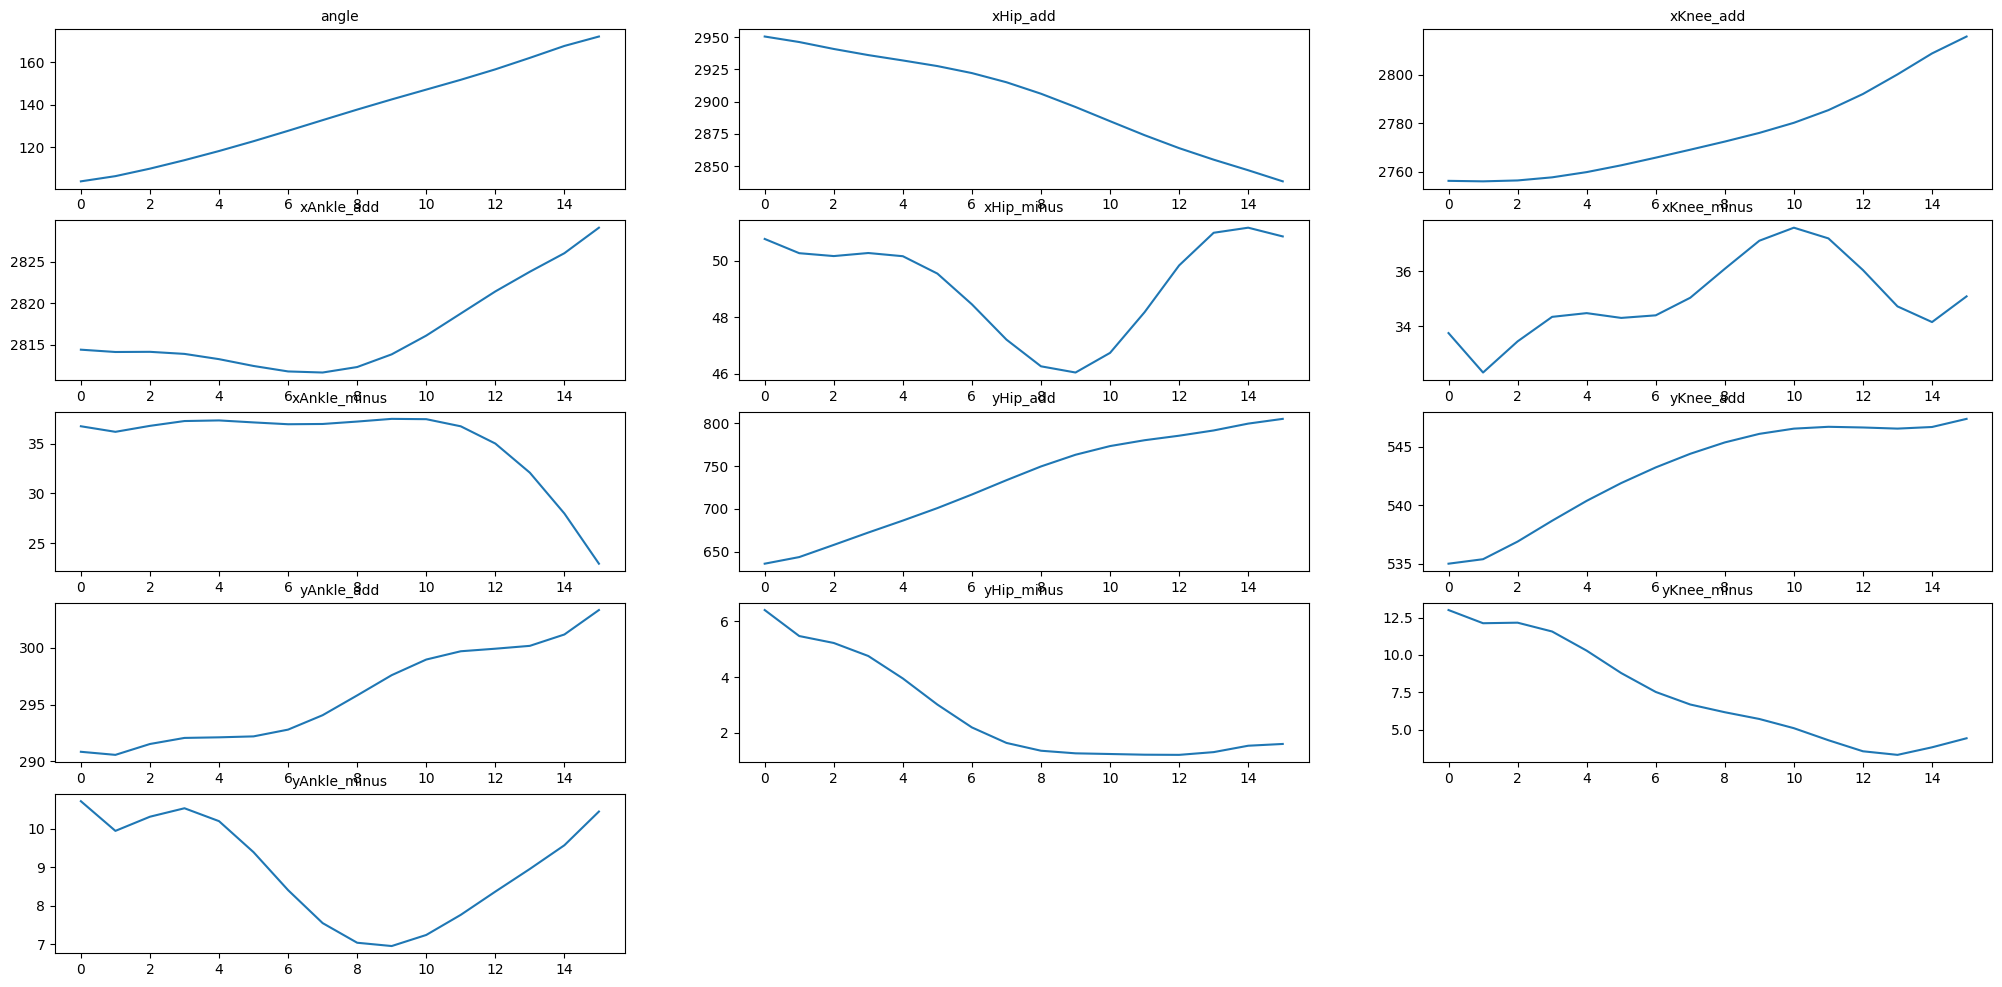

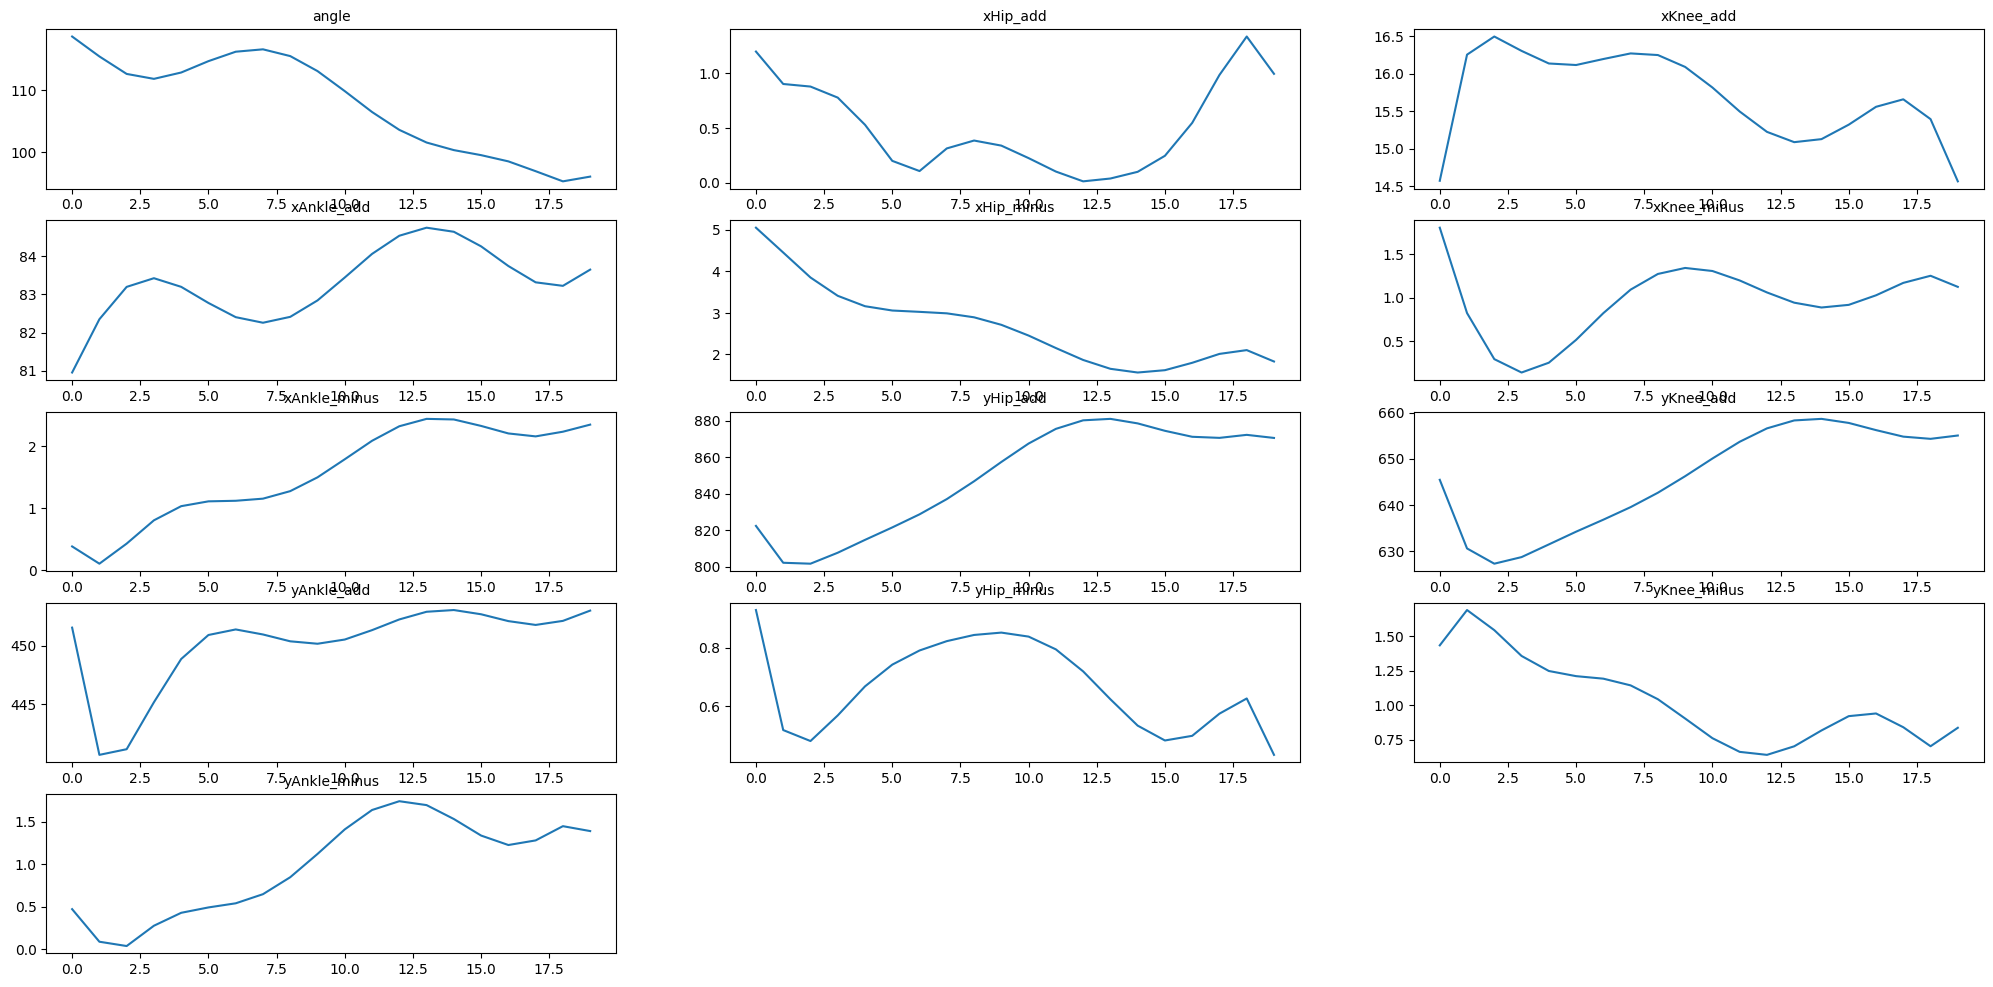

In [146]:
def visualize_timeSeries_data(pidList, mode):
    for pid in pidList:
        if pid == '01':
            csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_4_sit2stand_timeSeries_data.csv'
            if mode=="Stand2Sit":
                csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_4_stand2sit_timeSeries_data.csv'
            df = pd.read_csv(csv_path, header=None)
            n_feature, n_timestamp = df.shape[0], df.shape[1]

            plt.figure(figsize=(25, 12))
            feature_name_list = ['angle', 'xHip_add', 'xKnee_add', 'xAnkle_add', 'xHip_minus', 'xKnee_minus', 'xAnkle_minus', 'yHip_add', 'yKnee_add', 'yAnkle_add', 'yHip_minus', 'yKnee_minus', 'yAnkle_minus']
            for featureIdx in range(n_feature):
                value = df.iloc[featureIdx, :]
                plt.subplot(5, 3, featureIdx+1)
                plt.title(f'{feature_name_list[featureIdx]}', fontsize=10)
                plt.plot(value)
            plt.show()
            

visualize_timeSeries_data(allID_list, "Sit2Stand")
visualize_timeSeries_data(allID_list, "Stand2Sit")

## Normalize

In [153]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def normalize_timeSeries_data(pidList, mode):
    for pid in pidList:
        # if pid == "01":
        if pid > "01":
            csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_4_sit2stand_timeSeries_data.csv'
            csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_5_sit2stand_timeSeries_normalize_data.csv'
            if mode=="Stand2Sit":
                csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_4_stand2sit_timeSeries_data.csv'
                csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_5_stand2sit_timeSeries_normalize_data.csv'

            if (os.path.exists(csv_path)==False):
                print(f'[Notice] pid {pid} sit-stand coordinate file does not exist.')
            else:
                df = pd.read_csv(csv_path, header=None)
                n_feature, n_timestamp = df.shape[0], df.shape[1]

                data_scaled = []
                for featureIdx in range(n_feature):
                    value = np.array(df.iloc[featureIdx, :].values)
                    value = value.reshape(len(value), 1)
                    scaler = MinMaxScaler()
                    value_scaled = scaler.fit_transform(value)
                    value_scaled = value_scaled.reshape(-1)
                    data_scaled.append(value_scaled)
                
                df_scaled = pd.DataFrame(data_scaled)
                print(f'[pid {pid}] {csv_path_output}')
                df_scaled.to_csv(csv_path_output, index=None, header=None)


normalize_timeSeries_data(allID_list, "Sit2Stand")
normalize_timeSeries_data(allID_list, "Stand2Sit")

[pid 02] data/02/Sit-and-Stand_20240314/02_5_sit2stand_timeSeries_normalize_data.csv
[pid 03] data/03/Sit-and-Stand_20240314/03_5_sit2stand_timeSeries_normalize_data.csv
[pid 04] data/04/Sit-and-Stand_20240314/04_5_sit2stand_timeSeries_normalize_data.csv
[pid 05] data/05/Sit-and-Stand_20240314/05_5_sit2stand_timeSeries_normalize_data.csv
[pid 06] data/06/Sit-and-Stand_20240314/06_5_sit2stand_timeSeries_normalize_data.csv
[pid 07] data/07/Sit-and-Stand_20240314/07_5_sit2stand_timeSeries_normalize_data.csv
[pid 09] data/09/Sit-and-Stand_20240314/09_5_sit2stand_timeSeries_normalize_data.csv
[pid 10] data/10/Sit-and-Stand_20240314/10_5_sit2stand_timeSeries_normalize_data.csv
[pid 100] data/100/Sit-and-Stand_20240314/100_5_sit2stand_timeSeries_normalize_data.csv
[pid 11] data/11/Sit-and-Stand_20240314/11_5_sit2stand_timeSeries_normalize_data.csv
[pid 12] data/12/Sit-and-Stand_20240314/12_5_sit2stand_timeSeries_normalize_data.csv
[pid 13] data/13/Sit-and-Stand_20240314/13_5_sit2stand_timeSer

## Downsampling

In [9]:
def get_sitstand_period_time(pidList):
    sit2stand_min = 1000
    sit2stand_max = 0
    stand2sit_min = 1000
    stand2sit_max = 0
    for key in sit_and_stand_dict:
        p1 = sit_and_stand_dict[key]['period1']
        p2 = sit_and_stand_dict[key]['period2']
        
        if p1>sit2stand_max: sit2stand_max = p1
        if p1<sit2stand_min: sit2stand_min = p1
        if p2>stand2sit_max: stand2sit_max = p2
        if p2<stand2sit_min: stand2sit_min = p2
        
    return sit2stand_min, sit2stand_max, stand2sit_min, stand2sit_max


sit2stand_min, sit2stand_max, stand2sit_min, stand2sit_max = get_sitstand_period_time(allID_list)
print(f'[Sit-to-Stand] min: {sit2stand_min}, max: {sit2stand_max}')
print(f'[Stand-to-Sit] min: {stand2sit_min}, max: {stand2sit_max}')

[Sit-to-Stand] min: 6, max: 200
[Stand-to-Sit] min: 7, max: 151


In [31]:
def downsampling_to_specific_length(df, minNum, mode):
    df = df.transpose()
    if mode=="Sit2Stand":
        # df.set_index(pd.date_range(start='1/1/2000', periods=len(df), end='7/1/2000'), inplace=True)
        df.set_index(pd.date_range(start='1/1/2000', periods=len(df), end='6/1/2000'), inplace=True)
    if mode=="Stand2Sit":
        df.set_index(pd.date_range(start='1/1/2000', periods=len(df), end='7/1/2000'), inplace=True)
    
    resampled_df = pd.DataFrame()
    if df.shape[0] > minNum: 
        resampled_df = df.resample('1ME').mean() # resampled_df = df.resample('1M').mean()
        resampled_df.reset_index(inplace=True, drop=True)
    else:
        print(f'Need to check number of rows of df.')
    if resampled_df.shape[0] != minNum:
        print(f'[Notice] Not same length!')
    resampled_df = resampled_df.transpose()
    return resampled_df


def downsampling_timeSeries_data(pidList, mode):
    tmp_min, tmp_max = 0, 0
    for pid in pidList:
        if pid == '01':
        # if pid > '01':
            csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_5_sit2stand_timeSeries_normalize_data.csv'
            csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_6_sit2stand_timeSeries_downsampling.csv'
            tmp_min = sit2stand_min
            if mode=="Stand2Sit":
                csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_5_stand2sit_timeSeries_normalize_data.csv'
                csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_6_stand2sit_timeSeries_downsampling.csv'
                tmp_min = stand2sit_min

            if not os.path.exists(csv_path):
                print(f'[pid {pid}] time series data csv file does not exist.')
            else:
                df = pd.read_csv(csv_path, header=None)
                n_feature, n_timestamp = df.shape[0], df.shape[1]

                df_downsampling = df.copy()
                if n_timestamp > tmp_min:
                    df_downsampling = downsampling_to_specific_length(df, tmp_min, mode)
                    print(f'[pid {pid}] {csv_path} [{df.shape[0]}, {df.shape[1]}]->[{df_downsampling.shape[0]}, {df_downsampling.shape[1]}]')
                else:
                    print(f'-> no downsampling.')
                df_downsampling.to_csv(csv_path_output, index=False, header=False)
       
    

downsampling_timeSeries_data(allID_list, "Sit2Stand")
downsampling_timeSeries_data(allID_list, "Stand2Sit")

[pid 01] data/01/Sit-and-Stand_20240314/01_5_stand2sit_timeSeries_normalize_data.csv [13, 20]->[13, 7]


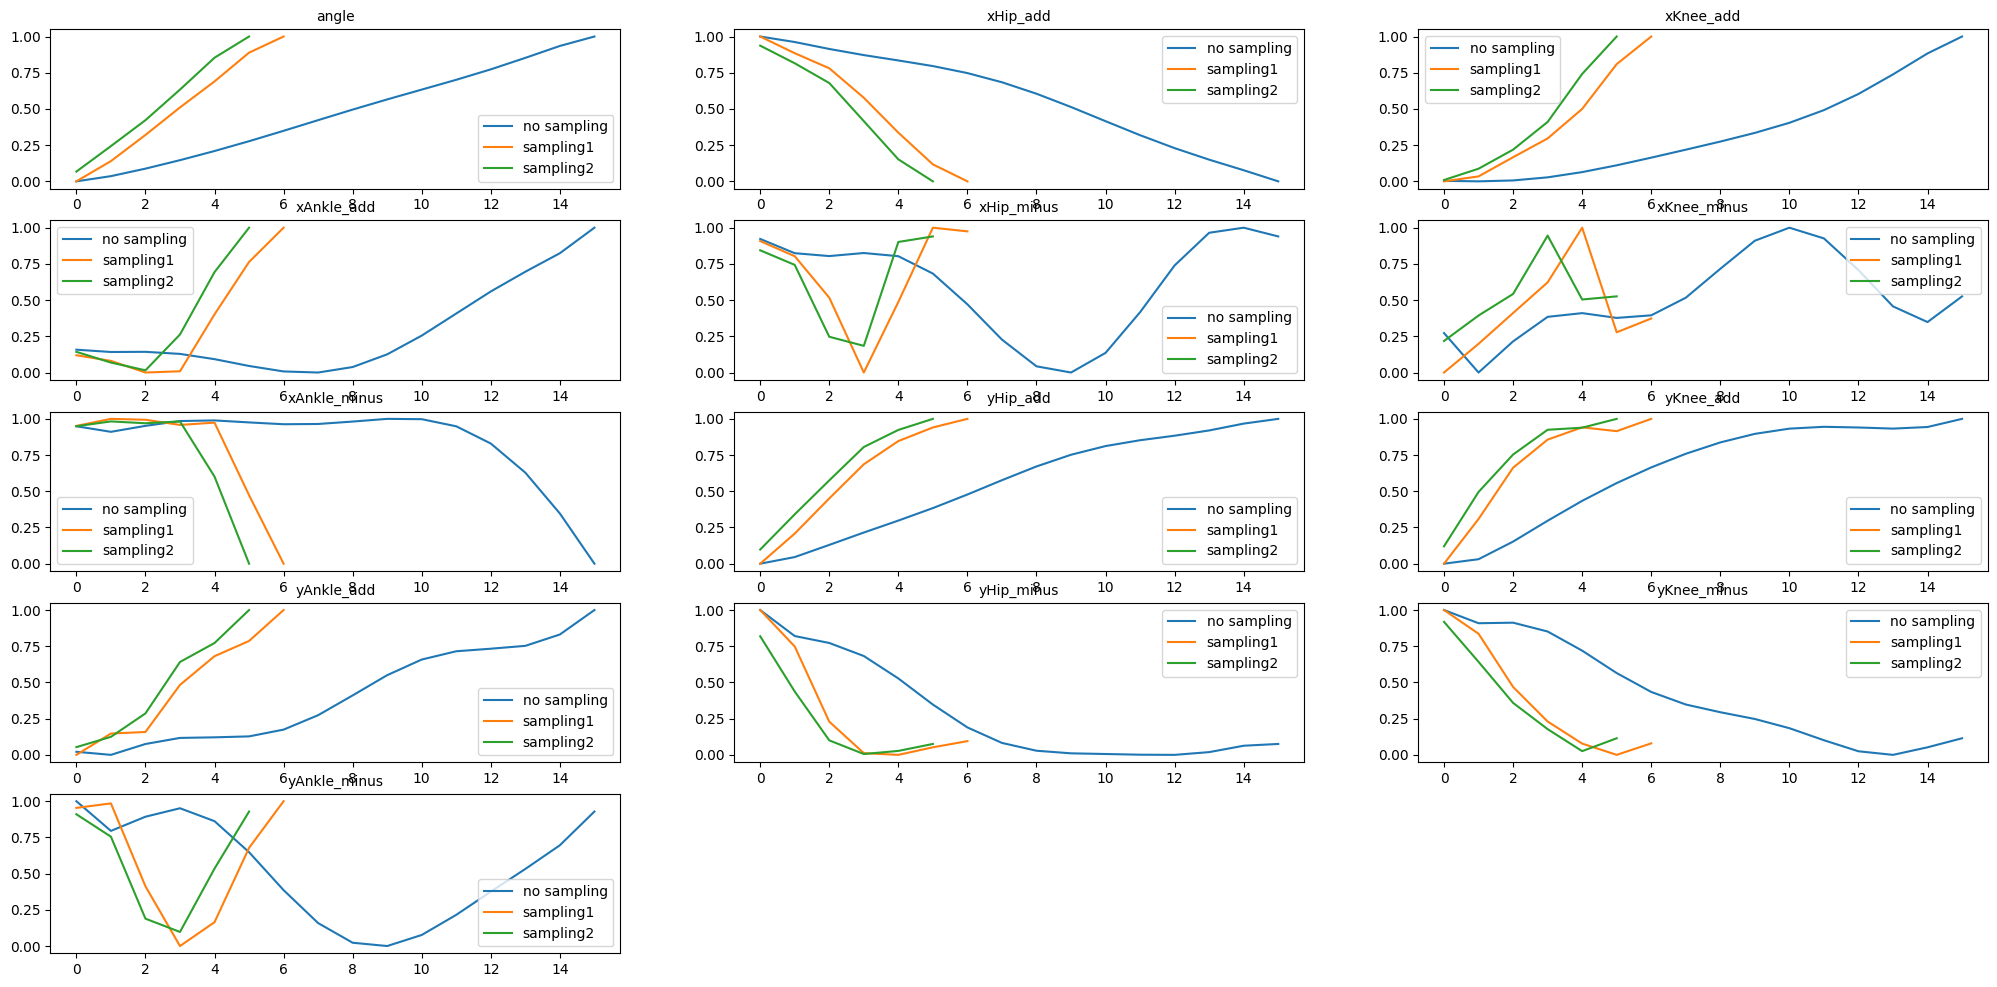

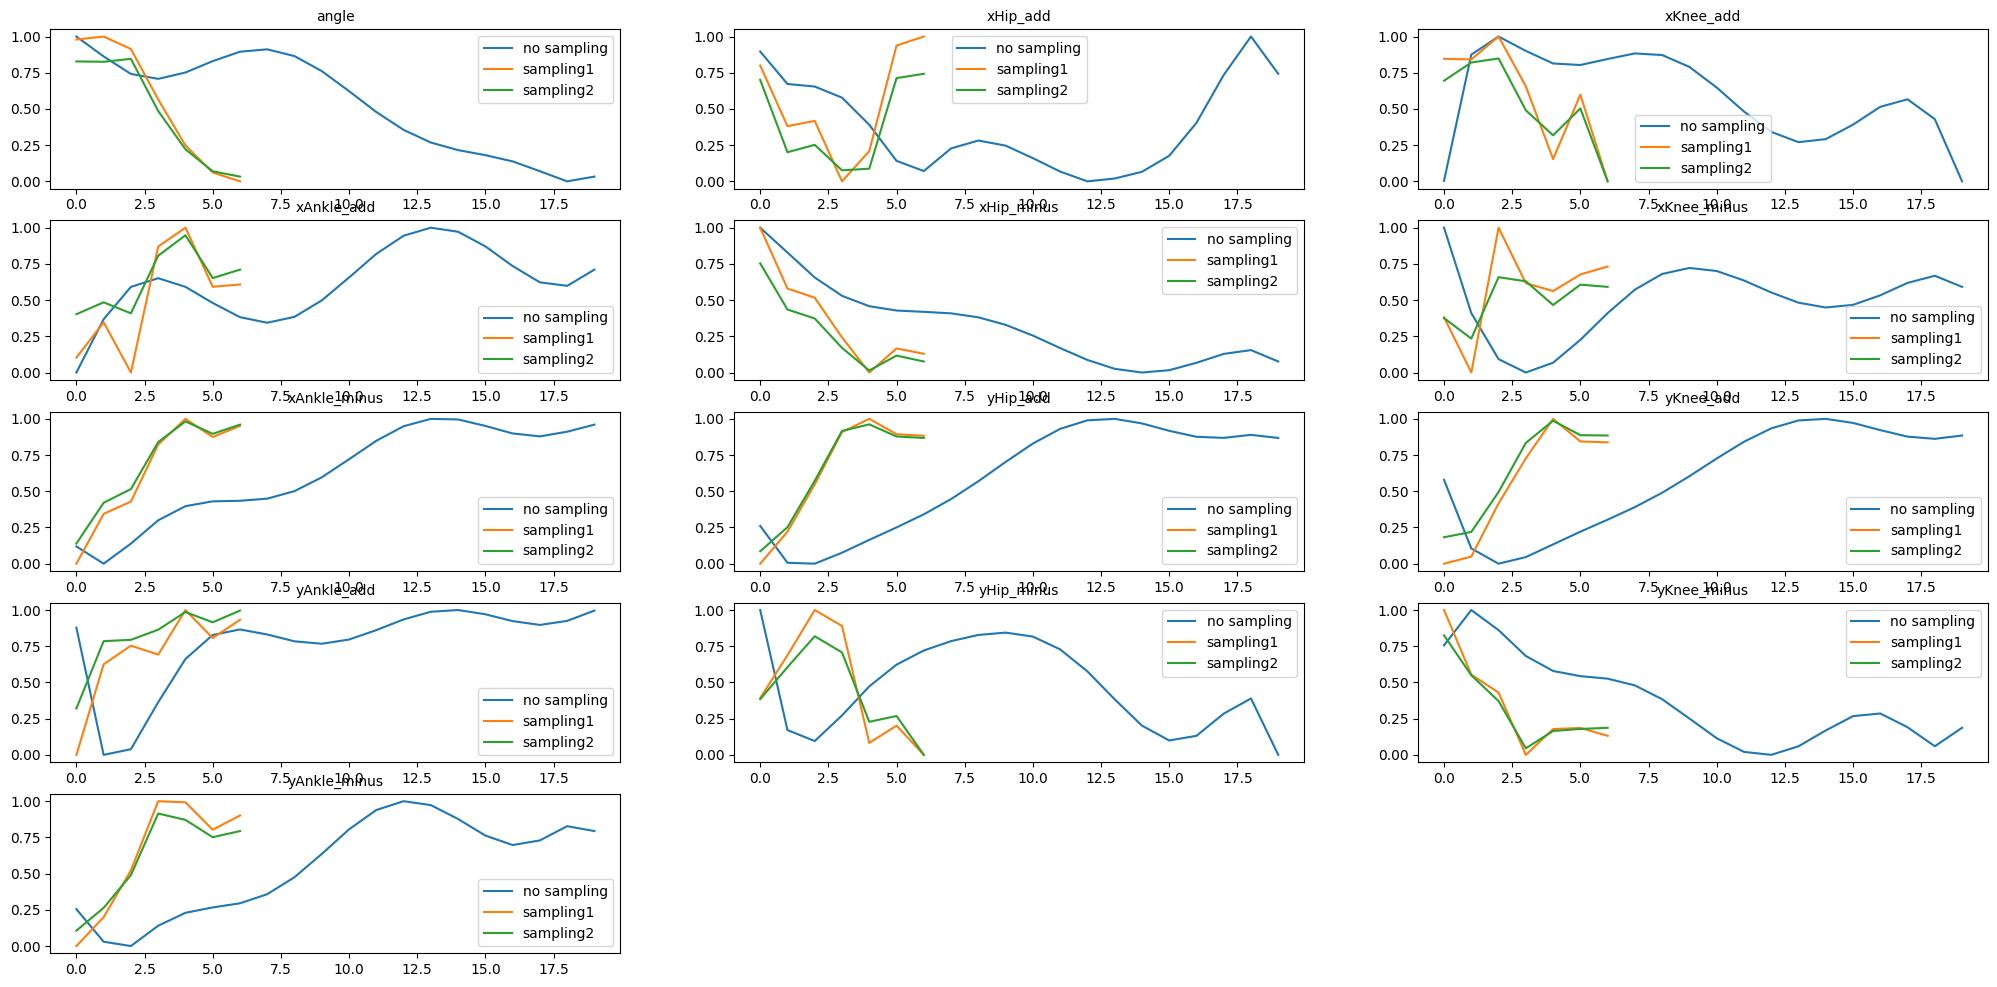

In [21]:
def visualize_downsampling_data(pidList, mode):
    for pid in pidList:
        if pid == '01':
            csv_path0 = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_sit2stand_keypoints_downsampling.csv'
            csv_path1 = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_5_sit2stand_timeSeries_normalize_data.csv'
            csv_path2 = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_6_sit2stand_timeSeries_downsampling.csv'
            if mode=="Stand2Sit":
                csv_path0 = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_stand2sit_keypoints_downsampling.csv'
                csv_path1 = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_5_stand2sit_timeSeries_normalize_data.csv'
                csv_path2 = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_6_stand2sit_timeSeries_downsampling.csv'
            df0 = pd.read_csv(csv_path0, header=None)
            df0 = df0.transpose()
            df1 = pd.read_csv(csv_path1, header=None)
            df2 = pd.read_csv(csv_path2, header=None)
            n_feature, n_timestamp0 = df0.shape[0], df0.shape[1]
            n_feature, n_timestamp1 = df1.shape[0], df1.shape[1]
            n_feature, n_timestamp2 = df2.shape[0], df2.shape[1]
            data_scaled = []
            for featureIdx in range(n_feature):
                value = np.array(df0.iloc[featureIdx, :].values)
                value = value.reshape(len(value), 1)
                scaler = MinMaxScaler()
                value_scaled = scaler.fit_transform(value)
                value_scaled = value_scaled.reshape(-1)
                data_scaled.append(value_scaled)
            df0 = pd.DataFrame(data_scaled)

            plt.figure(figsize=(25, 12))
            feature_name_list = ['angle', 'xHip_add', 'xKnee_add', 'xAnkle_add', 'xHip_minus', 'xKnee_minus', 'xAnkle_minus', 'yHip_add', 'yKnee_add', 'yAnkle_add', 'yHip_minus', 'yKnee_minus', 'yAnkle_minus']
            for featureIdx in range(n_feature):
                value0 = df0.iloc[featureIdx, :]
                value1 = df1.iloc[featureIdx, :]
                value2 = df2.iloc[featureIdx, :]
                plt.subplot(5, 3, featureIdx+1)
                plt.plot(value1, label='no sampling')
                plt.plot(value0, label='sampling1')
                plt.plot(value2, label='sampling2')
                plt.title(f'{feature_name_list[featureIdx]}', fontsize=10)
                plt.legend()
            plt.show()


visualize_downsampling_data(allID_list, "Sit2Stand")
visualize_downsampling_data(allID_list, "Stand2Sit")

## Upsampling

In [24]:
period_time_list_sit2stand = []
period_time_list_stand2sit = []

def get_sitstand_period_time_list(pidList):
    tmp_list_sit2stand, tmp_list_stand2sit = [], []
    for key in sit_and_stand_dict:
        time1 = sit_and_stand_dict[key]['period1']
        time2 = sit_and_stand_dict[key]['period2']
        
        tmp_list_sit2stand.append(time1)
        tmp_list_stand2sit.append(time2)
        
    return tmp_list_sit2stand, tmp_list_stand2sit


period_time_list_sit2stand, period_time_list_stand2sit = get_sitstand_period_time_list(allID_list)

In [41]:
np.array(period_time_list_sit2stand)

array([ 16,  12,  12,  18,  29,  10,  21,  22,  35,  25,  35,  19,  32,
        83,  34, 200,  92,  26,  32,   7,  32, 100,  22,  92,  26,  37,
         6,  62,  26,  76,  33,  22,  26,  27,  27,  21,  17,  22,  10,
        25,  42,  19,  81,  66,  61,   9,  15,  35,  65,  21,  18,  29,
        26,  45,  25,  15,  75,  34,   9,  22,  18,  18,  15,  21,   8,
        27,  16,  36,  23,  17,  37,  19,  29,  30,  15,  21,  31,  14,
         9,  20,  14,   6,  10,  30,  20,   7,  37,  54], dtype=int64)

In [28]:
period_time_median_sit2stand = int(np.median(np.array(period_time_list_sit2stand)))
period_time_median_stand2sit = int(np.median(np.array(period_time_list_stand2sit)))

period_time_mean_sit2stand = int(np.mean(np.array(period_time_list_sit2stand)))
period_time_mean_stand2sit = int(np.mean(np.array(period_time_list_stand2sit)))

print(f'[Sit2Stand] 中位數：{period_time_median_sit2stand}, 平均值：{period_time_mean_sit2stand}')
print(f'[Stand2Sit] 中位數：{period_time_median_stand2sit}, 平均值：{period_time_mean_stand2sit}')

[Sit2Stand] 中位數：25, 平均值：31
[Stand2Sit] 中位數：29, 平均值：34


In [43]:
def upsampling_to_median_length(df, median):
    end_date = '1/' + str(median) + '/2000'
    df = df.transpose()
    df.set_index(pd.date_range(start='1/1/2000', periods=len(df), end=end_date), inplace=True)

    resampled_df = pd.DataFrame()
    resampled_df = df.resample('1D').ffill()
    resampled_df.reset_index(inplace=True, drop=True)
    resampled_df = resampled_df.transpose()
    return resampled_df

def downsampling_to_median_length(df, median):
    end_date = '1/' + str(median) + '/2000'
    df = df.transpose()
    df.set_index(pd.date_range(start='1/1/2000', periods=len(df), end=end_date), inplace=True)

    resampled_df = pd.DataFrame()
    resampled_df = df.resample('1D').mean()
    resampled_df.reset_index(inplace=True, drop=True)
    resampled_df = resampled_df.transpose()
    return resampled_df

def upsampling_timeSeries_data(pidList, mode):
    median = 0
    for pid in pidList:
        # if pid == '01':
        # if pid == '05':
        if pid >= '01':
            csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_5_sit2stand_timeSeries_normalize_data.csv'
            csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_7_sit2stand_timeSeries_resampling.csv'
            median = period_time_median_sit2stand
            if mode=="Stand2Sit":
                csv_path = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_5_stand2sit_timeSeries_normalize_data.csv'
                csv_path_output = DATAPATH + pid + '/Sit-and-Stand_20240314/' + pid + '_7_stand2sit_timeSeries_resampling.csv'
                median = period_time_median_stand2sit

            if not os.path.exists(csv_path):
                print(f'[pid {pid}] time series data csv file does not exist.')
            else:
                df = pd.read_csv(csv_path, header=None)
                n_feature, n_timestamp = df.shape[0], df.shape[1]


                if n_timestamp > median: ### downsampling
                    df = downsampling_to_median_length(df, median)
                    print(f'[Pid {pid}] Downsampling: {n_timestamp} -> {df.shape[1]}, Data: {df.shape}')
                elif n_timestamp < median: ### upsampling
                    df = upsampling_to_median_length(df, median)
                    print(f'[Pid {pid}] Upsampling: {n_timestamp} -> {df.shape[1]}, Data: {df.shape}')
                else: print(f'[Pid {pid}] Do NOT need to do sampling.')

                df.to_csv(csv_path_output, index=False, header=False)
       
    

upsampling_timeSeries_data(allID_list, "Sit2Stand")
upsampling_timeSeries_data(allID_list, "Stand2Sit")

[Pid 01] Upsampling: 16 -> 25, Data: (13, 25)
[Pid 02] Upsampling: 12 -> 25, Data: (13, 25)
[Pid 03] Upsampling: 12 -> 25, Data: (13, 25)
[Pid 04] Upsampling: 18 -> 25, Data: (13, 25)
[Pid 05] Downsampling: 29 -> 25, Data: (13, 25)
[Pid 06] Upsampling: 10 -> 25, Data: (13, 25)
[Pid 07] Upsampling: 21 -> 25, Data: (13, 25)
[Pid 09] Upsampling: 22 -> 25, Data: (13, 25)
[Pid 10] Downsampling: 35 -> 25, Data: (13, 25)
[Pid 100] Do NOT need to do sampling.
[Pid 11] Downsampling: 35 -> 25, Data: (13, 25)
[Pid 12] Upsampling: 19 -> 25, Data: (13, 25)
[Pid 13] Downsampling: 32 -> 25, Data: (13, 25)
[Pid 16] Downsampling: 83 -> 25, Data: (13, 25)
[Pid 17] Downsampling: 34 -> 25, Data: (13, 25)
[Pid 18] Downsampling: 200 -> 25, Data: (13, 25)
[Pid 19] Downsampling: 92 -> 25, Data: (13, 25)
[Pid 20] Downsampling: 26 -> 25, Data: (13, 25)
[Pid 21] Downsampling: 32 -> 25, Data: (13, 25)
[Pid 22] Upsampling: 7 -> 25, Data: (13, 25)
[Pid 24] Downsampling: 32 -> 25, Data: (13, 25)
[Pid 25] Downsamplin